## IMPORT LIBRARIES

In [2]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [3]:
# READING DATA FROM CSV FILES
df_x = pd.read_csv('linearX.csv')
df_y = pd.read_csv('linearY.csv')

In [4]:
# CONVERTING TO NUMPY ARRAYS

X_raw = df_x.values.flatten()
y = df_y.values.flatten()

In [5]:
# PRINTING FIRST 5 VALUES TO VERIFY
print('X DATA HEAD --> ', X_raw[:5])
print('Y DATA HEAD --> ', y[:5])

X DATA HEAD -->  [8.  9.1 8.4 6.9 7.7]
Y DATA HEAD -->  [0.99007 0.99769 0.99386 0.99508 0.9963 ]


## DATA PREPROCESSING

In [6]:
# PREPROCESSING: Z-SCORE NORMALIZATION (STANDARDIZATION)
# FORMULA: Z = (X - MEAN) / STD_DEV
# THIS HELPS GRADIENT DESCENT CONVERGE FASTER

# CALCULATING MEAN AND STANDARD DEVIATION 

mean_x = np.sum(X_raw) / len(X_raw)
std_x = np.sqrt(np.sum((X_raw - mean_x)**2) / len(X_raw))

# APPLYING NORMALIZATION
X = (X_raw - mean_x) / std_x

In [7]:
print(f"MEAN OF X --> {mean_x:.4f}")
print(f"STD DEV OF X --> {std_x:.4f}")

MEAN OF X --> 8.0515
STD DEV OF X --> 1.7286


## DATA VISUALIZATION

ORIGINAL DATA

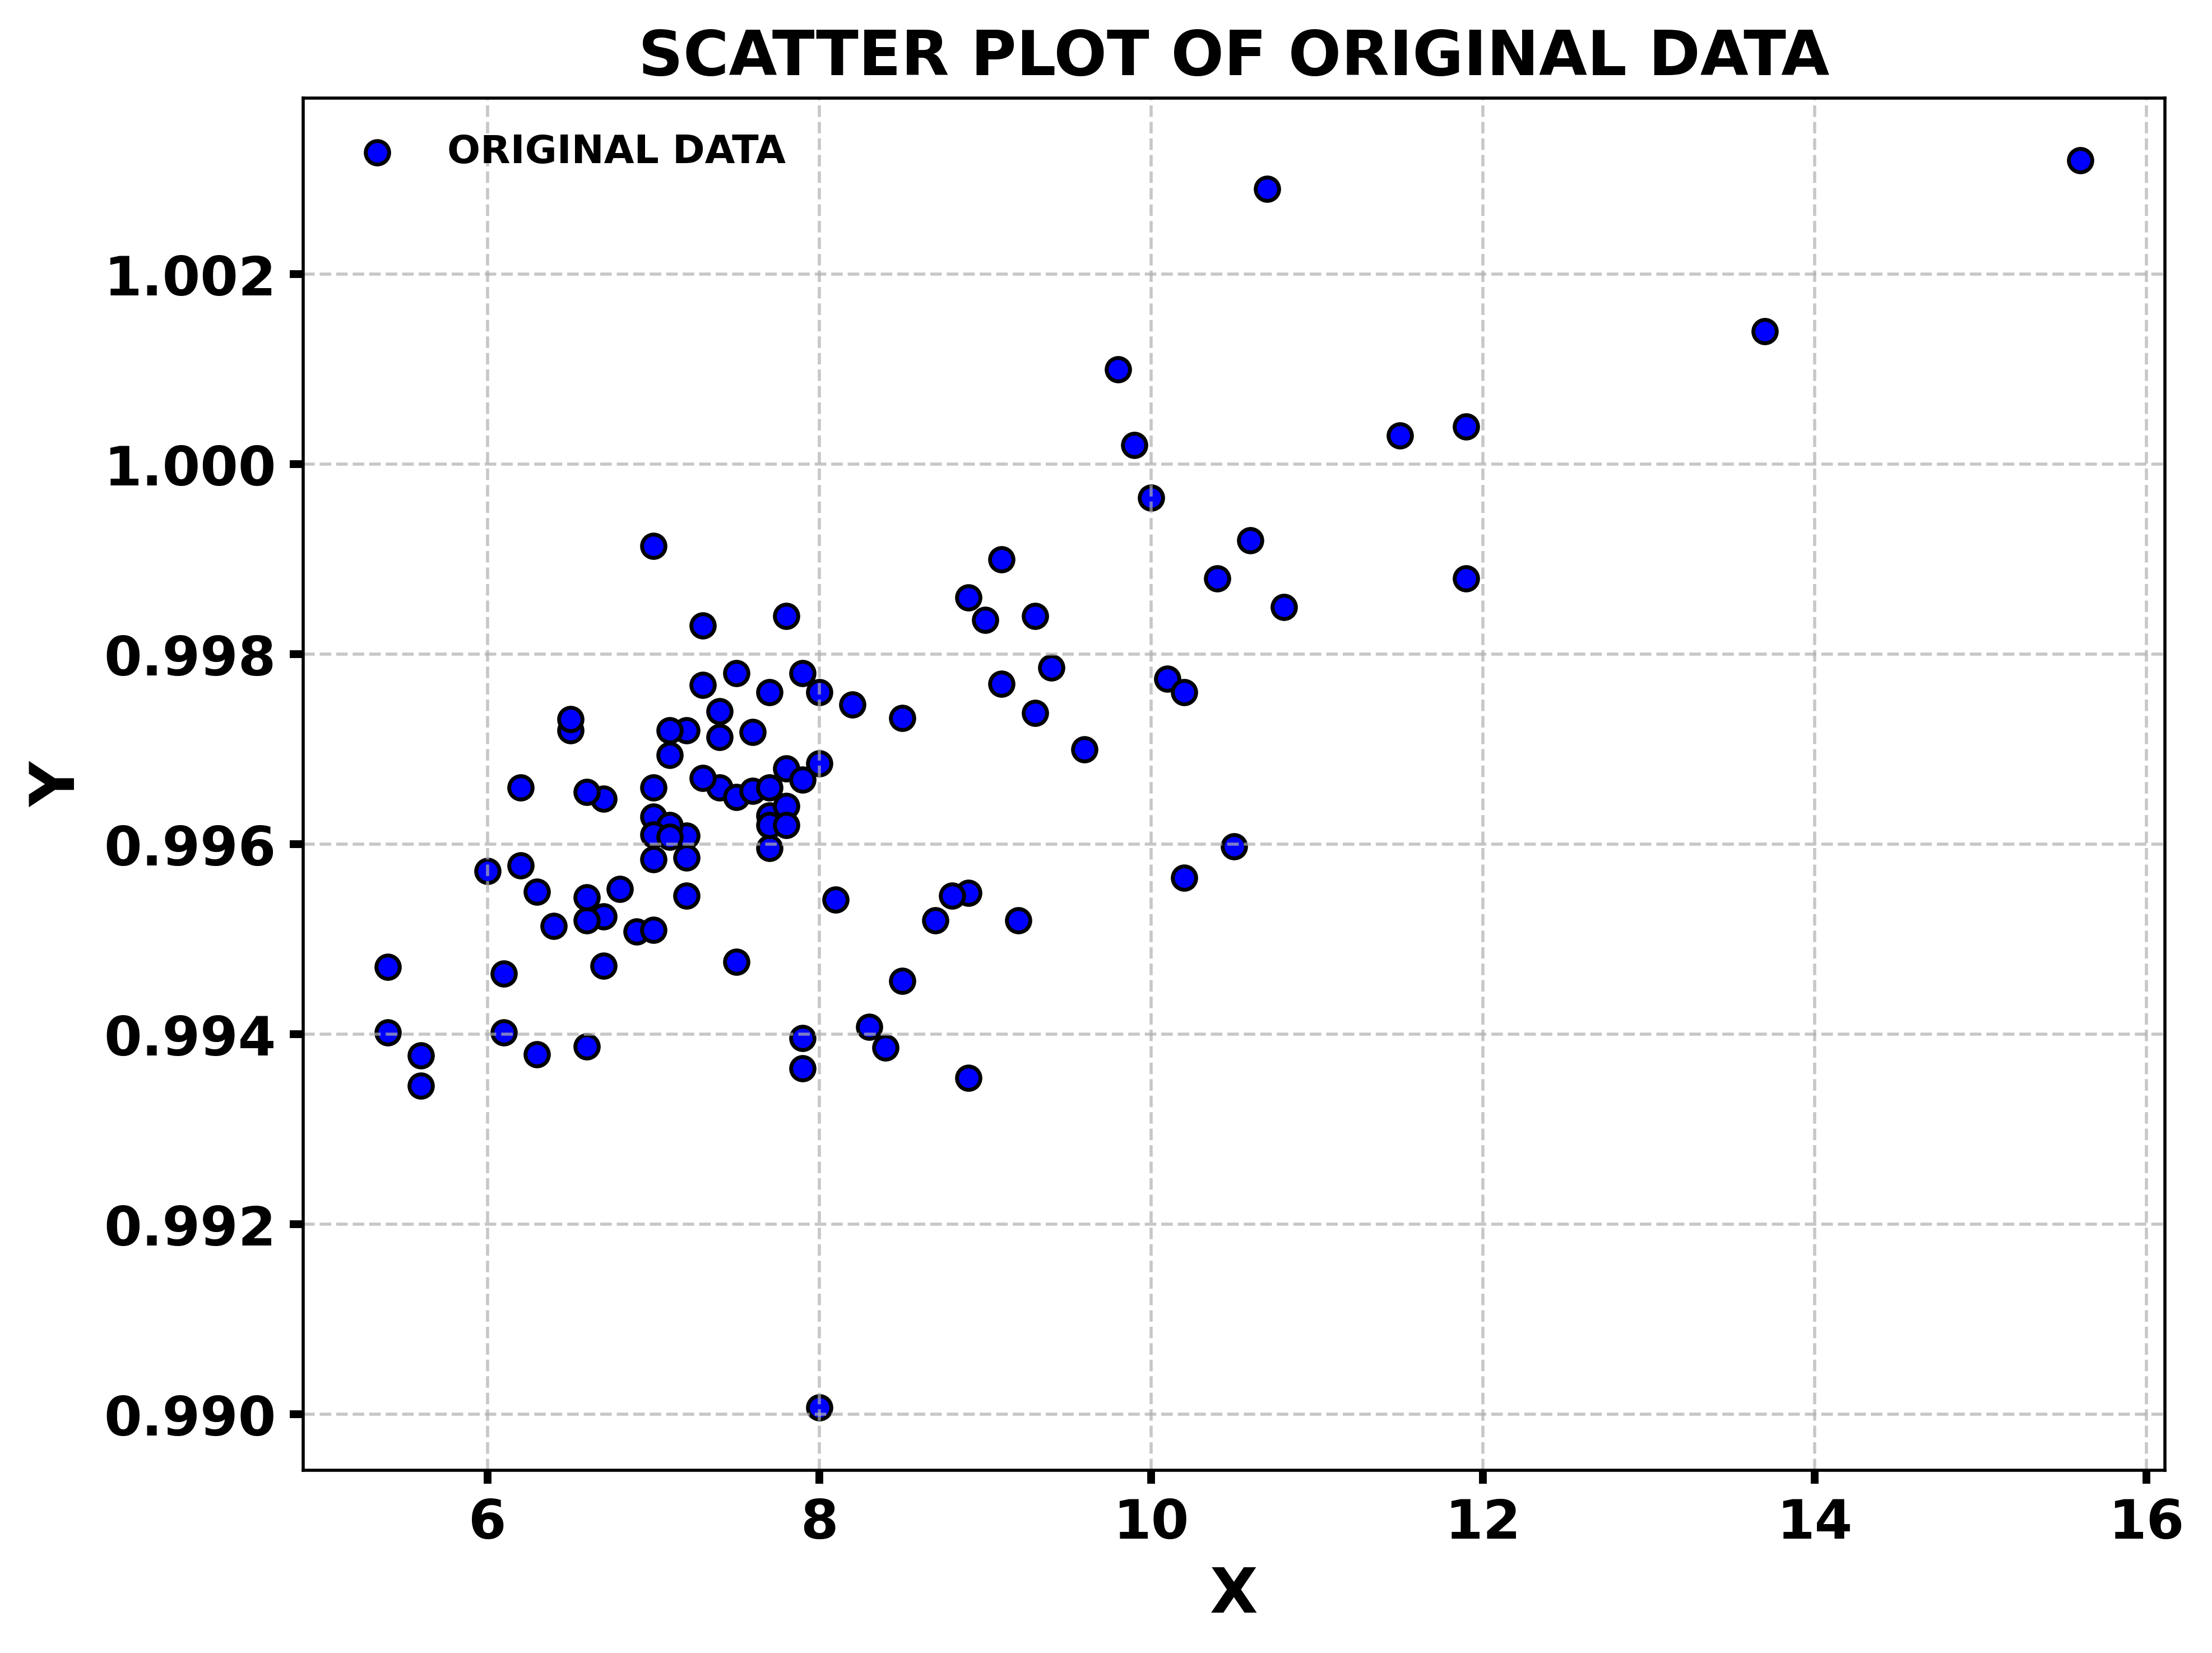

In [9]:
plt.figure(figsize = (8,6), dpi = 500)
plt.scatter(df_x, df_y, color = 'blue', edgecolors = 'black', label = 'ORIGINAL DATA')
plt.title('SCATTER PLOT OF ORIGINAL DATA', fontsize = 16, fontweight = 'bold')
plt.xlabel('X', fontsize = 16, fontweight = 'bold')
plt.ylabel('Y', fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper left', fontsize = 16, frameon = False, prop = {'weight' : 'bold'})
plt.tight_layout()
plt.show()

NORMALIZED DATA

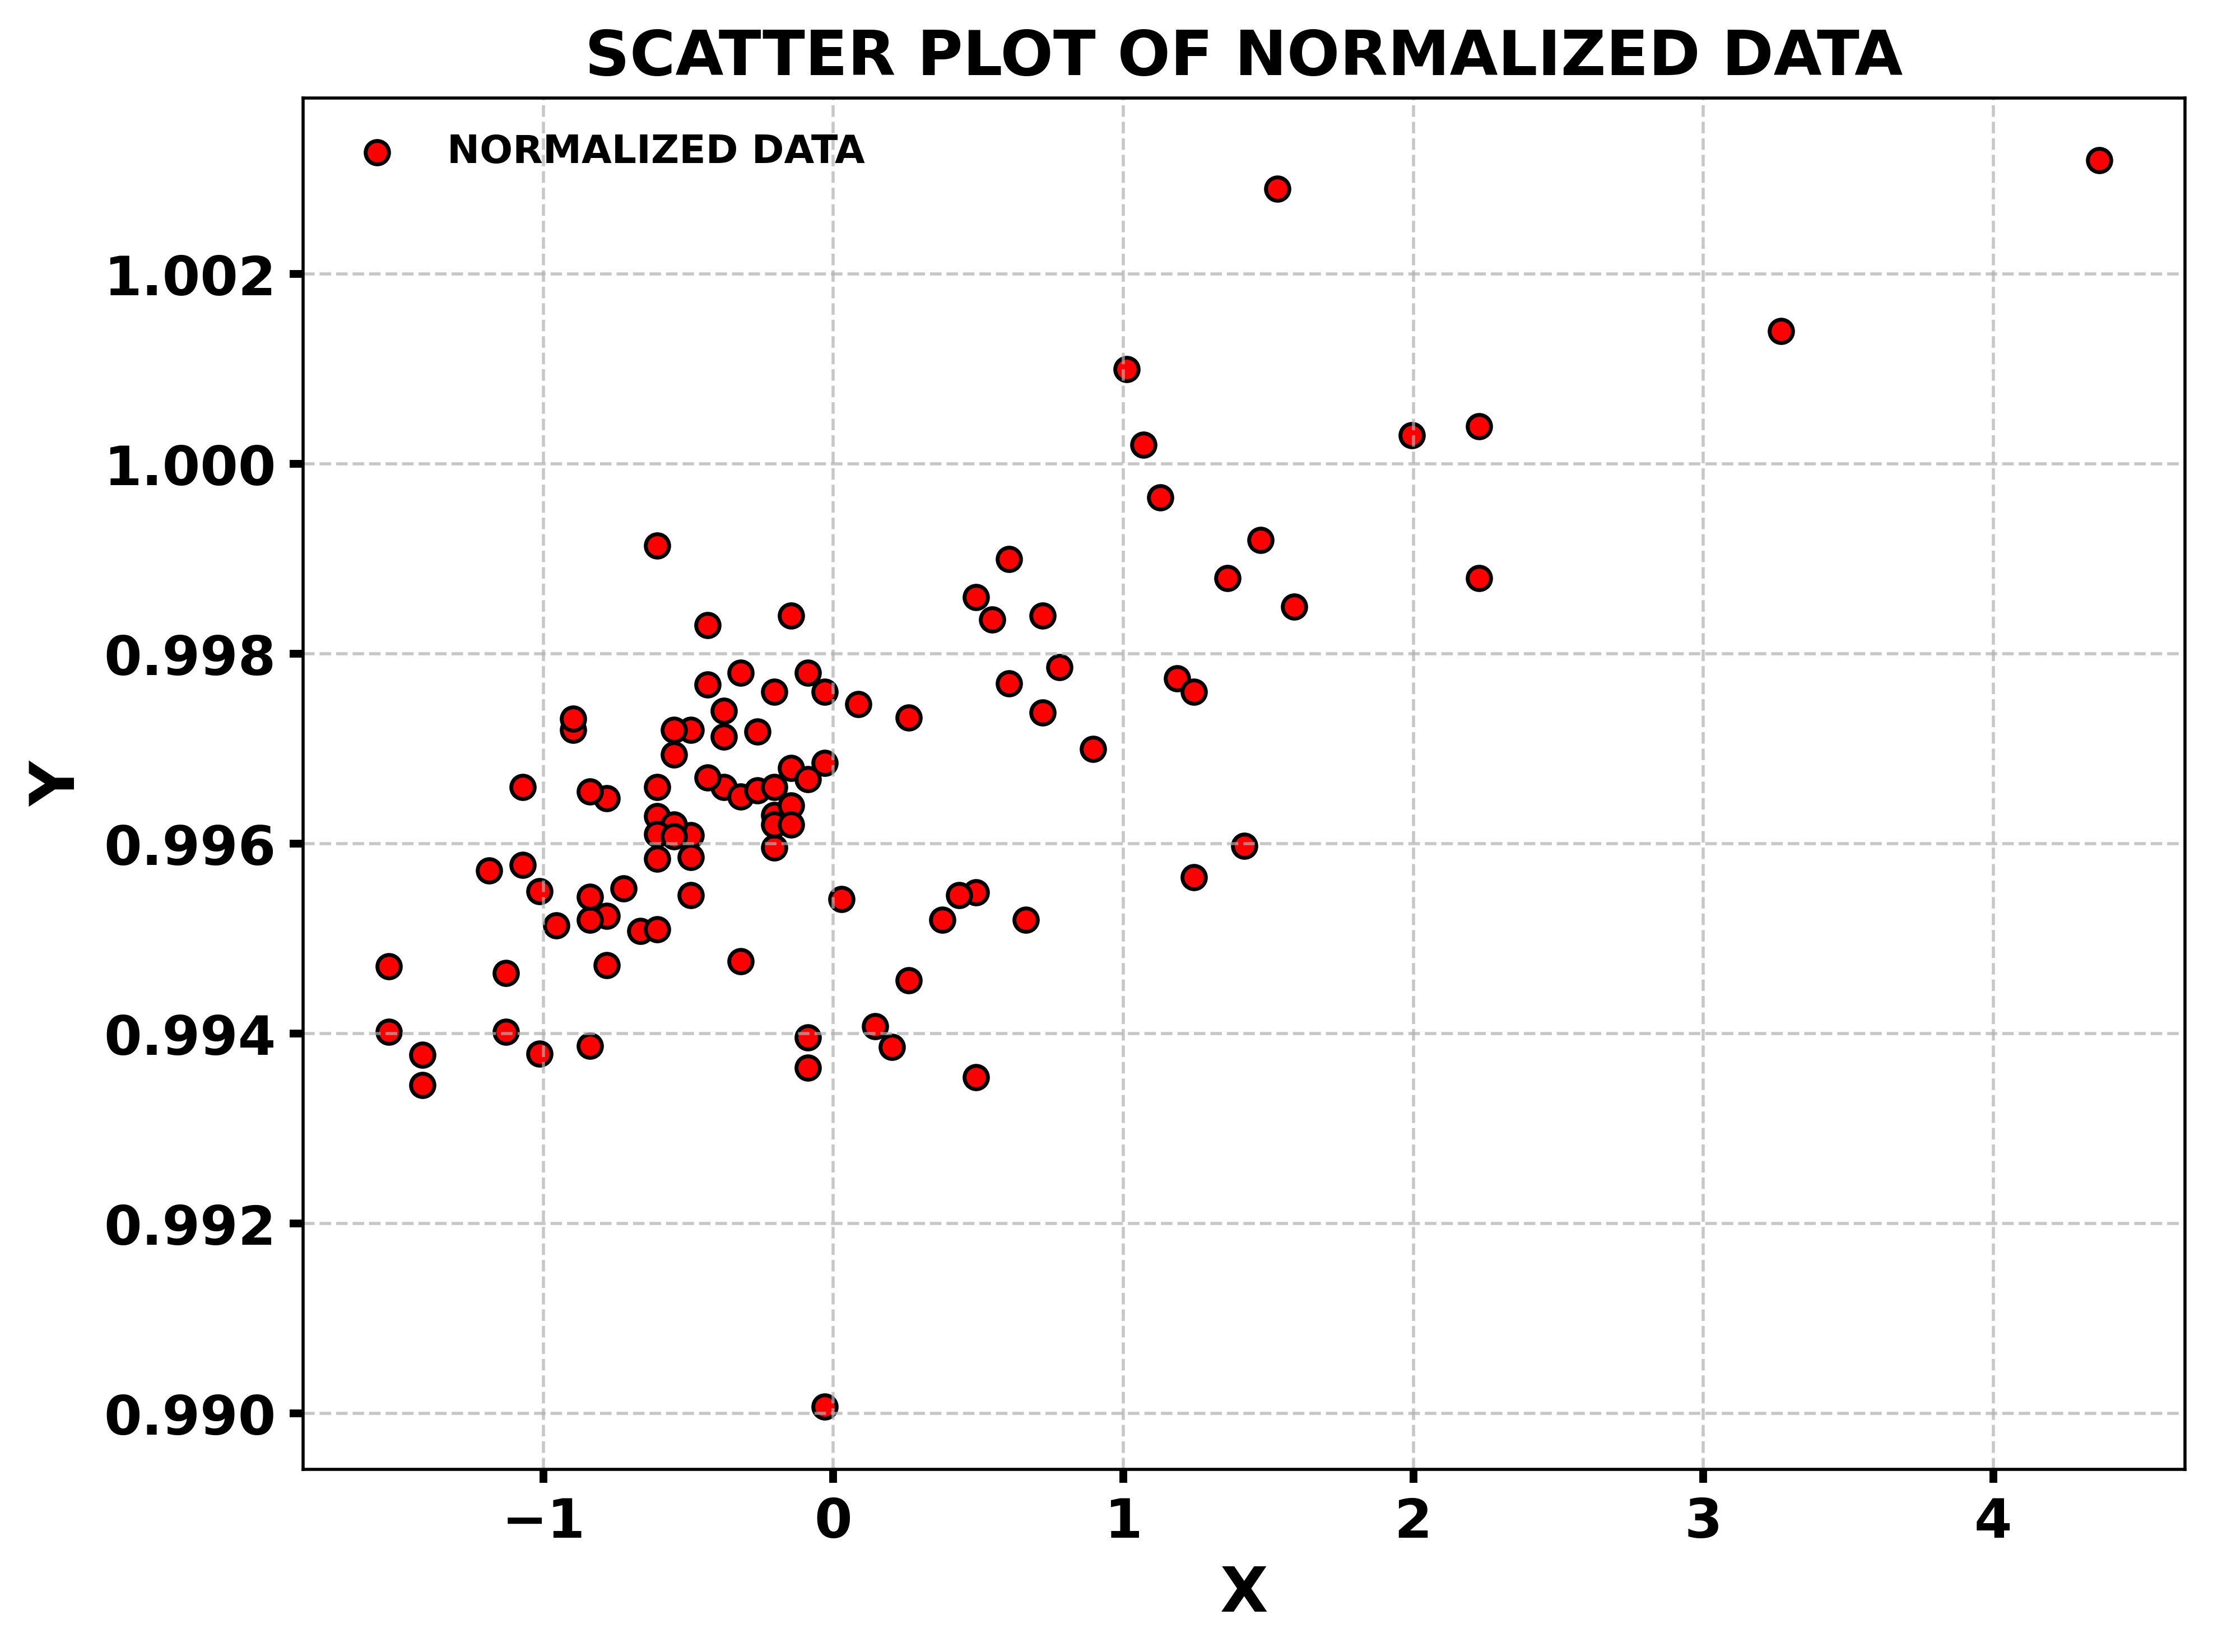

In [ ]:
plt.figure(figsize = (8,6), dpi = 500)
plt.scatter(X, y, color = 'red', edgecolor = 'black', label = "NORMALIZED DATA")
plt.title("SCATTER PLOT OF NORMALIZED DATA", fontsize = 16, fontweight = 'bold')
plt.xlabel("X", fontsize = 16, fontweight = 'bold')
plt.ylabel("Y", fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper left', fontsize = 16, frameon = False, prop = {'weight' : 'bold'})
plt.tight_layout()
plt.show()


HISTOGRAM PLOT

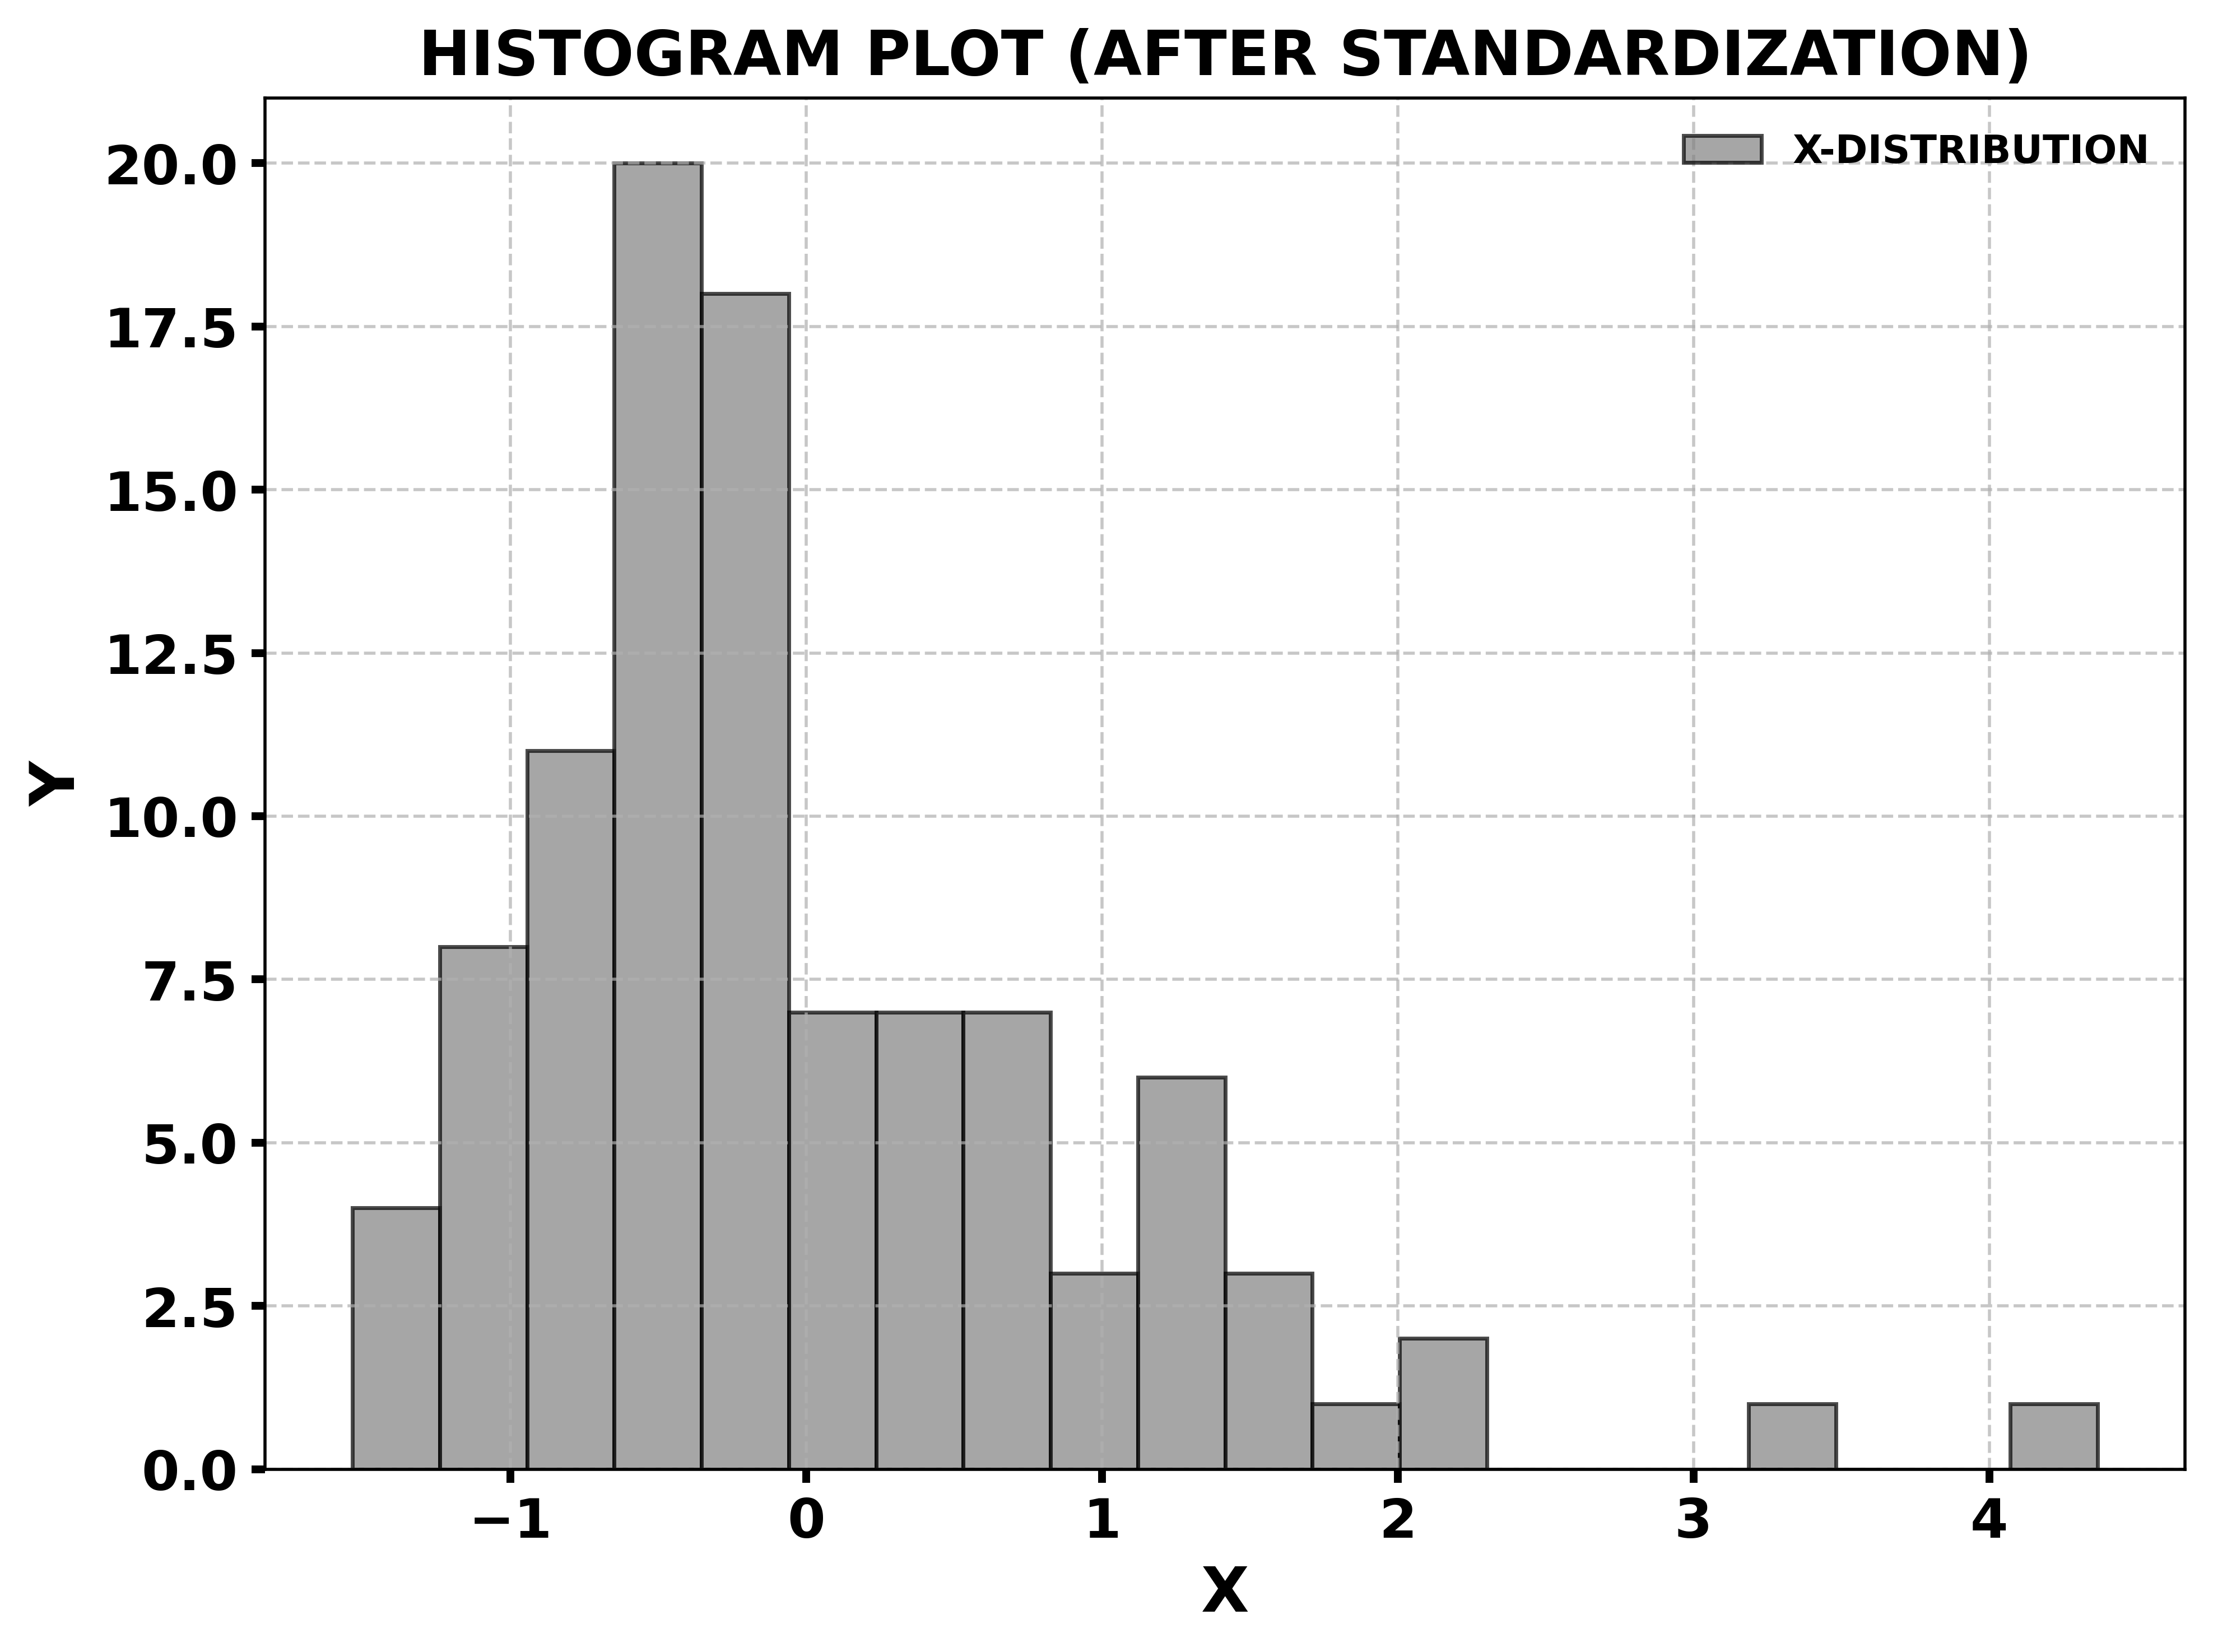

In [15]:
plt.figure(figsize = (8,6), dpi = 500)
plt.hist(X, bins = 20, color = 'grey', edgecolor = 'black',  alpha = 0.7, label = 'X-DISTRIBUTION')
plt.title('HISTOGRAM PLOT (AFTER STANDARDIZATION)', fontsize = 16, fontweight = 'bold')
plt.xlabel('X', fontsize = 16, fontweight = 'bold')
plt.ylabel('Y', fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels(): 
    label.set_fontweight('bold')
    
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc='upper right', fontsize=16, frameon=False, prop={'weight' : 'bold'})
plt.tight_layout()
plt.show()

## LINEAR REGRESSION CLASS IMPLEMENTATION

NO SCIKIT-LEARN

In [12]:
class LinearRegression:
    
    # INITIALIZING HYPERPARAMETERS
    def __init__(self, learning_rate = 0.5, iterations = 50, convergence = 1e-6):
        self.lr = learning_rate
        self.iterations = iterations
        self.convergence = convergence
        
        self.weights = None
        self.bias = None
        self.cost_history = []

    # COST FUNCTION
    def cost_function(self, X, y, weights, bias):
        # MSE --> J(w,b) = (1/2m) * SUM((y_pred - y)^2)
        m = len(y)
        predictions = weights * X + bias
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        return cost
    
    # TRAINING USING GRADIENT DESCENT
    def train(self, X, y, method = 'batch', batch_size = 5):
        # INITIALIZING PARAMETERS TO ZERO
        self.weights = 0.0
        self.bias = 0.0
        self.cost_history = []
        m = len(y)
        
        # GRADIENT DESCENT LOOP
        for i in range(self.iterations):
            
            if method == 'batch':
                # BATCH GRADIENT DESCENT: USE ALL DATA POINTS
                predictions = self.weights * X + self.bias
                error = predictions - y
                
                # CALCULATING GRADIENTS
                dw = (1 / m) * np.sum(error * X)
                db = (1 / m) * np.sum(error)
                
                # UPDATING PARAMETERS
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            
            elif method == 'stochastic':
                # STOCHASTIC GRADIENT DESCENT (SGD): USE 1 RANDOM DATA POINT
                idx = np.random.randint(0, m)
                X_i = X[idx]
                Y_i = y[idx]
                
                prediction = self.weights * X_i + self.bias
                error = prediction - Y_i
                
                dw = error * X_i
                db = error
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            
            elif method == 'minibatch':
                # MINI-BATCH GRADIENT DESCENT: USE A SMALL BATCH OF DATA
                indices = np.random.permutation(m)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                
                for j in range(0, m, batch_size):
                    X_batch = X_shuffled[j : j + batch_size]
                    y_batch = y_shuffled[j:j+batch_size]
                    m_batch = len(y_batch)
                    
                    predictions = self.weights * X_batch + self.bias
                    error = predictions - y_batch
                    
                    dw = (1 / m_batch) * np.sum(error * X_batch)
                    db = (1 / m_batch) * np.sum(error)
                    
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db
            
            # CALCULATE AND STORE COST FOR THIS ITERATION
            current_cost = self.cost_function(X, y, self.weights, self.bias)
            self.cost_history.append(current_cost)
            
            # CONVERGENCE CHECK 
            # FOR BATCH GD MAINLY           
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.convergence:
                if method == 'batch':
                    print(f"CONVERGED AT ITERATION {i}")
                    break
        
        return self.weights, self.bias, self.cost_history

    def predict(self, X):
        return self.weights * X + self.bias            

## TRAINING WITH LR=0.5

CONVERGENCE ANALYSIS

In [14]:
# INITIALIZING MODEL
model = LinearRegression(learning_rate = 0.5, iterations = 50, convergence = 1e-6)

# TRAINING USING BATCH GRADIENT DESCENT
w_final, b_final, cost_final = model.train(X, y, method = 'batch')

# CONVERGENCE CRITERIA MENTIONED
print("CONVERGENCE CRITERIA --> STOP WHEN ABSOLUTE CHANGE IN COST < 1e-6")

CONVERGED AT ITERATION 10
CONVERGENCE CRITERIA --> STOP WHEN ABSOLUTE CHANGE IN COST < 1e-6


In [15]:
# VALUES AFTER CONVERGENCE
print(f"FINAL COST FUNCTION VALUE --> {cost_final[-1]:.8f}")
print('LEARNING PARAREMETERS -->')
print(f"WEIGHT = {w_final:.4f} & BIAS = {b_final:.4f}")

FINAL COST FUNCTION VALUE --> 0.00000130
LEARNING PARAREMETERS -->
WEIGHT = 0.0014 & BIAS = 0.9961


## PLOTTING COST FUNCTION AND REGRESSION LINE

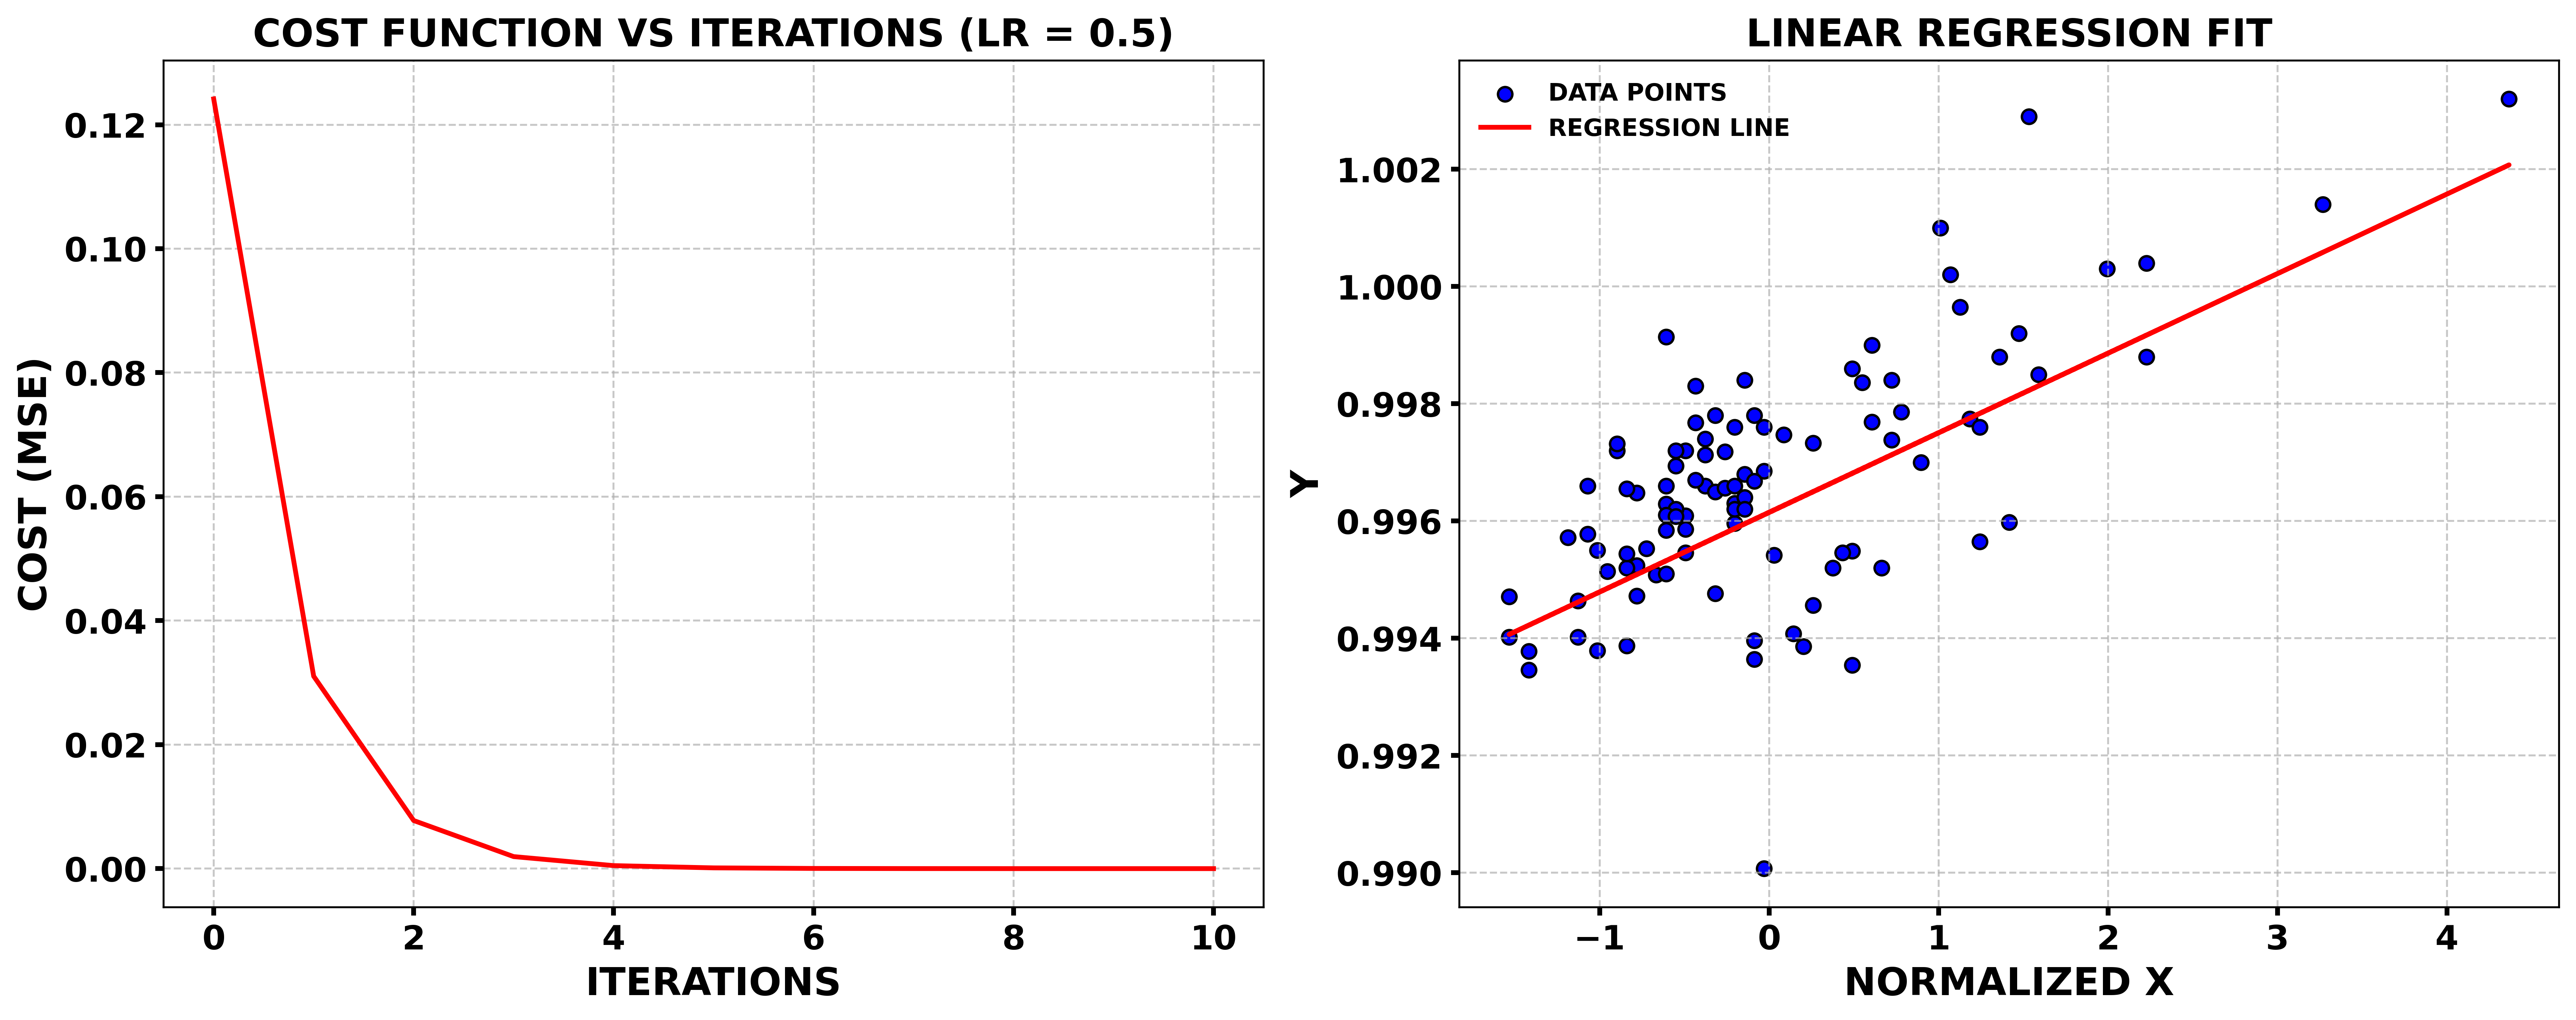

In [16]:
# CREATING FIGURE WITH TWO SUBPLOTS
plt.figure(figsize = (15,6), dpi = 500)

# SUBPLOT 1: COST FUNCTION VS ITERATION
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_final)), cost_final, color = 'red', linewidth = 2)
plt.title("COST FUNCTION VS ITERATIONS (LR = 0.5)", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)

# SUBPLOT 2: REGRESSION LINE FIT
plt.subplot(1, 2, 2)
predictions = model.predict(X)

# SCATTER PLOT OF ORIGINAL DATA
plt.scatter(X, y, color = 'blue', edgecolor='black', label="DATA POINTS")

# PLOTTING THE REGRESSION LINE
plt.plot(X, predictions, color = 'red', linewidth = 2, label="REGRESSION LINE")

plt.title("LINEAR REGRESSION FIT", fontsize=16, fontweight='bold')
plt.xlabel("NORMALIZED X", fontsize=16, fontweight='bold')
plt.ylabel("Y", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

## LEARNING RATE COMPARISON 

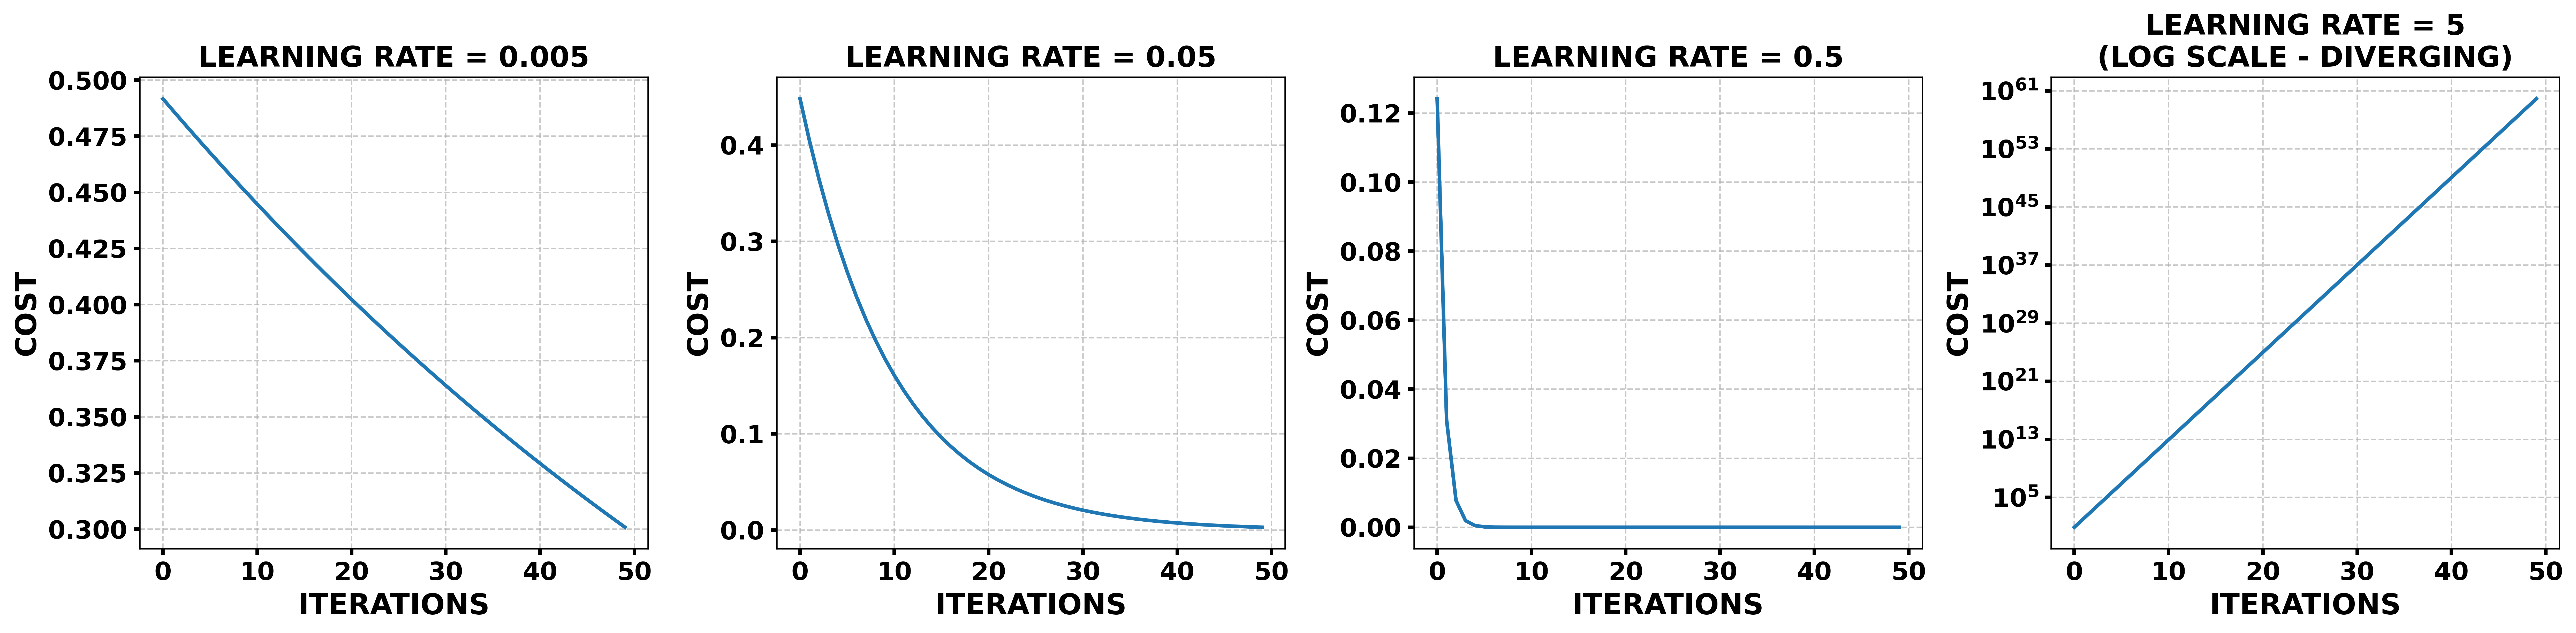

In [52]:
# DEFINING LEARNING RATES
learning_rates = [0.005, 0.05, 0.5, 5]
histories = {}

plt.figure(figsize = (20,5), dpi = 500)

for i, lr in enumerate(learning_rates):
    # TRAINING MODEL FOR EACH LEARNING RATE
    temp_model = LinearRegression(learning_rate=lr, iterations=50)
    __, _, cost_hist = temp_model.train(X, y, method='batch')
    histories[lr] = cost_hist
    
    # PLOTTING
    plt.subplot(1, 4, i + 1)
    plt.plot(range(len(cost_hist)), cost_hist, linewidth=2)

    plt.title(f"LEARNING RATE = {lr}", fontsize=16, fontweight='bold')
    plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
    plt.ylabel("COST", fontsize=16, fontweight='bold')

    plt.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
        label.set_fontweight('bold')

    plt.grid(True, linestyle='--', alpha=0.7)
    
    # HANDLING EXPLODING GRADIENT VISUALIZATION
    if cost_hist[-1] > 1e10:
        plt.yscale('log')
        plt.title(f"LEARNING RATE = {lr}\n(LOG SCALE - DIVERGING)", fontsize=16, fontweight='bold')
        
plt.tight_layout()
plt.show()

## CONVERGENCE ANALYSIS

CONVERGED AT ITERATION 849
CONVERGED AT ITERATION 106
CONVERGED AT ITERATION 10


C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\1470066579.py:19: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(error ** 2)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\1470066579.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.convergence:
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\1470066579.py:44: Runtim

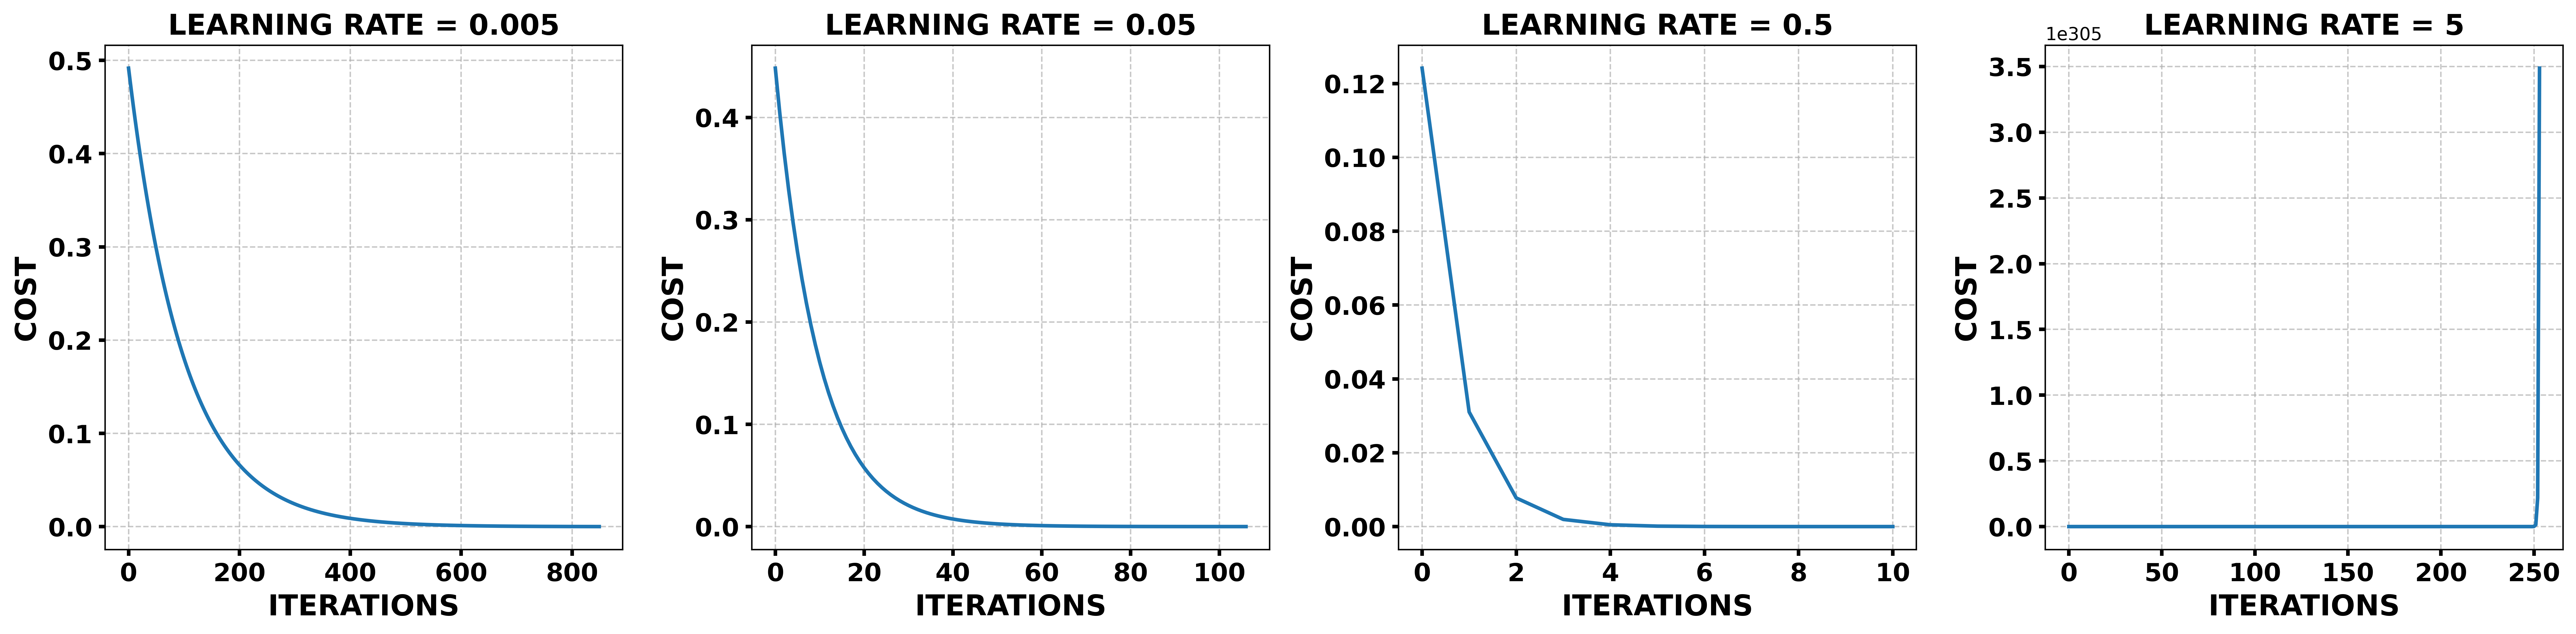

In [96]:
# DEFINING LEARNING RATES
learning_rates = [0.005, 0.05, 0.5, 5]
histories = {}

plt.figure(figsize = (20,5), dpi = 500)

for i, lr in enumerate(learning_rates):
    # TRAINING MODEL FOR EACH LEARNING RATE
    temp_model = LinearRegression(learning_rate=lr, iterations=1000)
    __, _, cost_hist = temp_model.train(X, y, method='batch')
    histories[lr] = cost_hist
    
    # PLOTTING
    plt.subplot(1, 4, i + 1)
    plt.plot(range(len(cost_hist)), cost_hist, linewidth=2)

    plt.title(f"LEARNING RATE = {lr}", fontsize=16, fontweight='bold')
    plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
    plt.ylabel("COST", fontsize=16, fontweight='bold')

    plt.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
        label.set_fontweight('bold')

    plt.grid(True, linestyle='--', alpha=0.7)
    
    # HANDLING EXPLODING GRADIENT VISUALIZATION
    if cost_hist[-1] > 1e10:
        plt.yscale('log')
        plt.title(f"LEARNING RATE = {lr}\n(LOG SCALE - DIVERGING)", fontsize=16, fontweight='bold')
        
plt.tight_layout()
plt.show()

**OBSERVATION:**

- `LR = 0.005` SHOWS VERY SLOW CONVERGENCE DUE TO A SMALL STEP SIZE.
- `LR = 0.05` CONVERGES STEADILY BUT REQUIRES MORE ITERATIONS.
- `LR = 0.5` ACHIEVES FAST AND STABLE CONVERGENCE, INDICATING THE OPTIMAL LEARNING RATE.
- `LR = 5` DIVERGES RAPIDLY, DEMONSTRATING THE EFFECT OF AN EXCESSIVELY LARGE LEARNING RATE CAUSING GRADIENT EXPLOSION.

## BATCH VS STOCHASTIC VS MINI-BATCH 

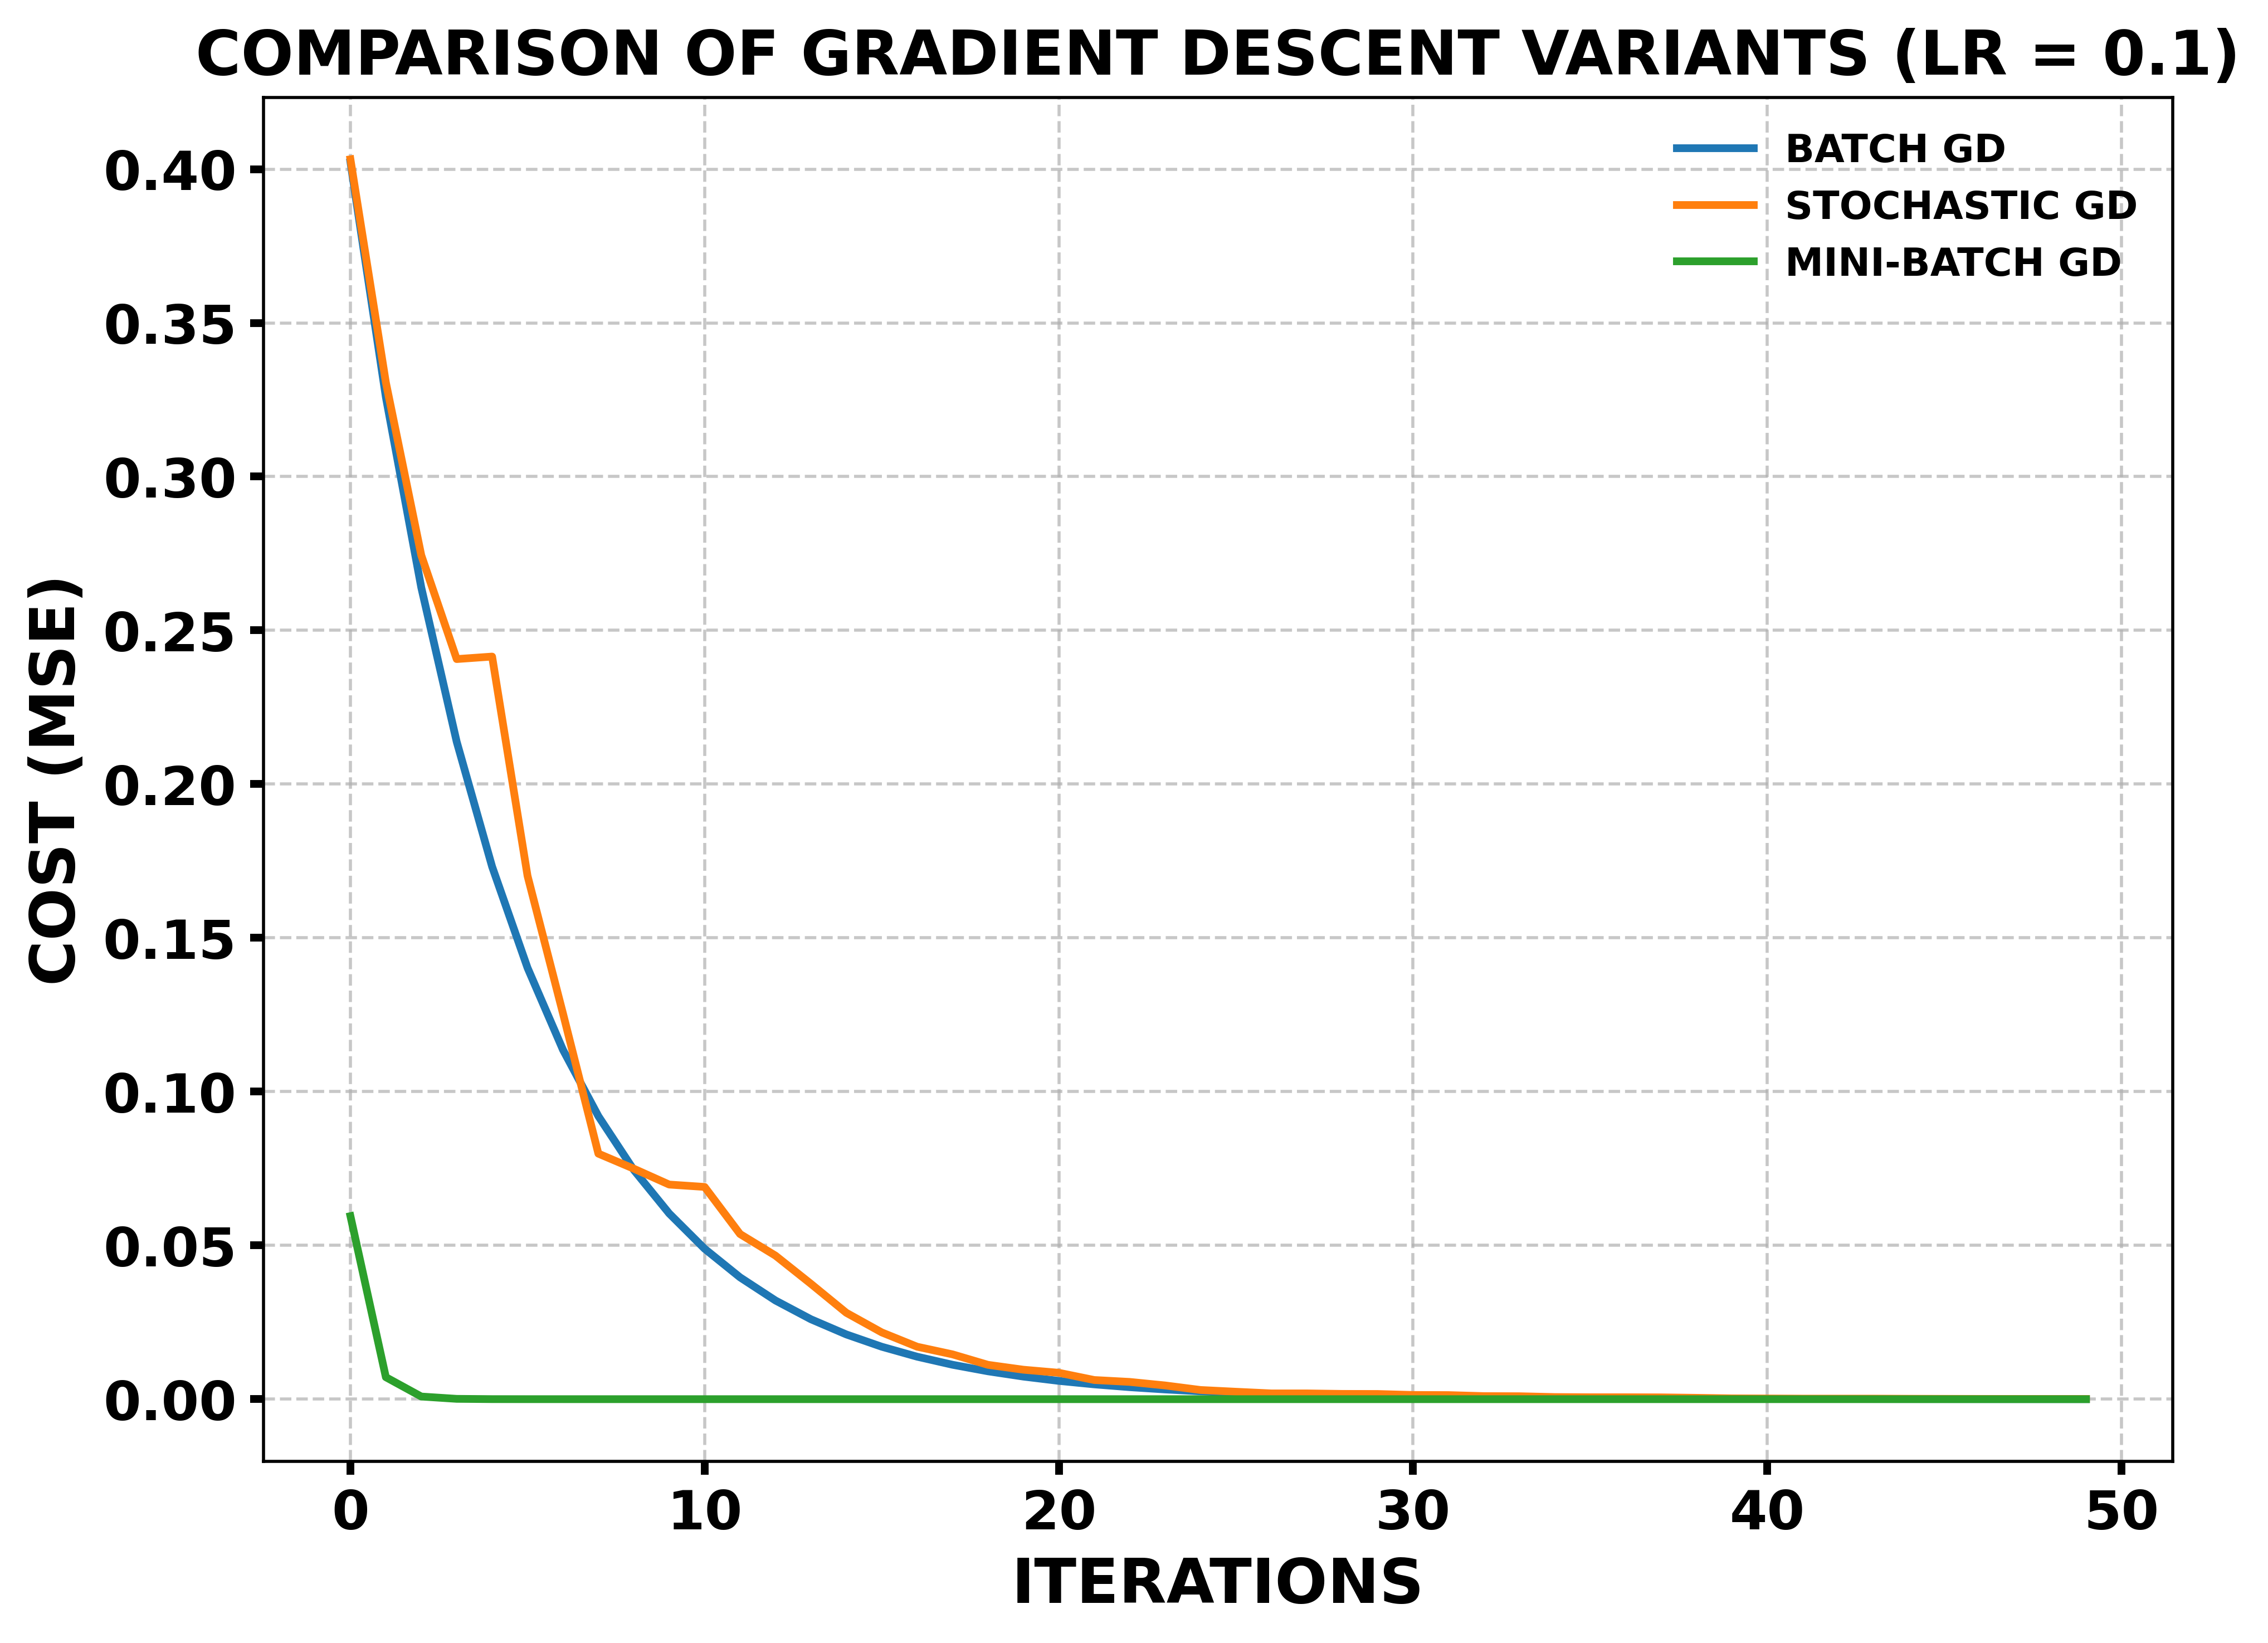

In [70]:
# TRAINING WITH DIFFERENT METHODS 
# USING LR=0.1 FOR STABILITY ACROSS METHODS

model_batch = LinearRegression(learning_rate=0.1, iterations=50)
_, _, batch_cost = model_batch.train(X, y, method='batch')

model_sgd = LinearRegression(learning_rate=0.1, iterations=50)
_, _, sgd_cost = model_sgd.train(X, y, method='stochastic')

model_mini = LinearRegression(learning_rate=0.1, iterations=50)
_, _, mini_cost = model_mini.train(X, y, method='minibatch', batch_size=10)

# PLOTTING COMPARISON
plt.figure(figsize=(8, 6), dpi=500)

plt.plot(batch_cost, label="BATCH GD", linewidth=2)
plt.plot(sgd_cost, label="STOCHASTIC GD", linewidth=2)
plt.plot(mini_cost, label="MINI-BATCH GD", linewidth=2)

plt.title("COMPARISON OF GRADIENT DESCENT VARIANTS (LR = 0.1)", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

## EFFECT OF BATCH SIZE IN MINI-BATCH GRADIENT DESCENT

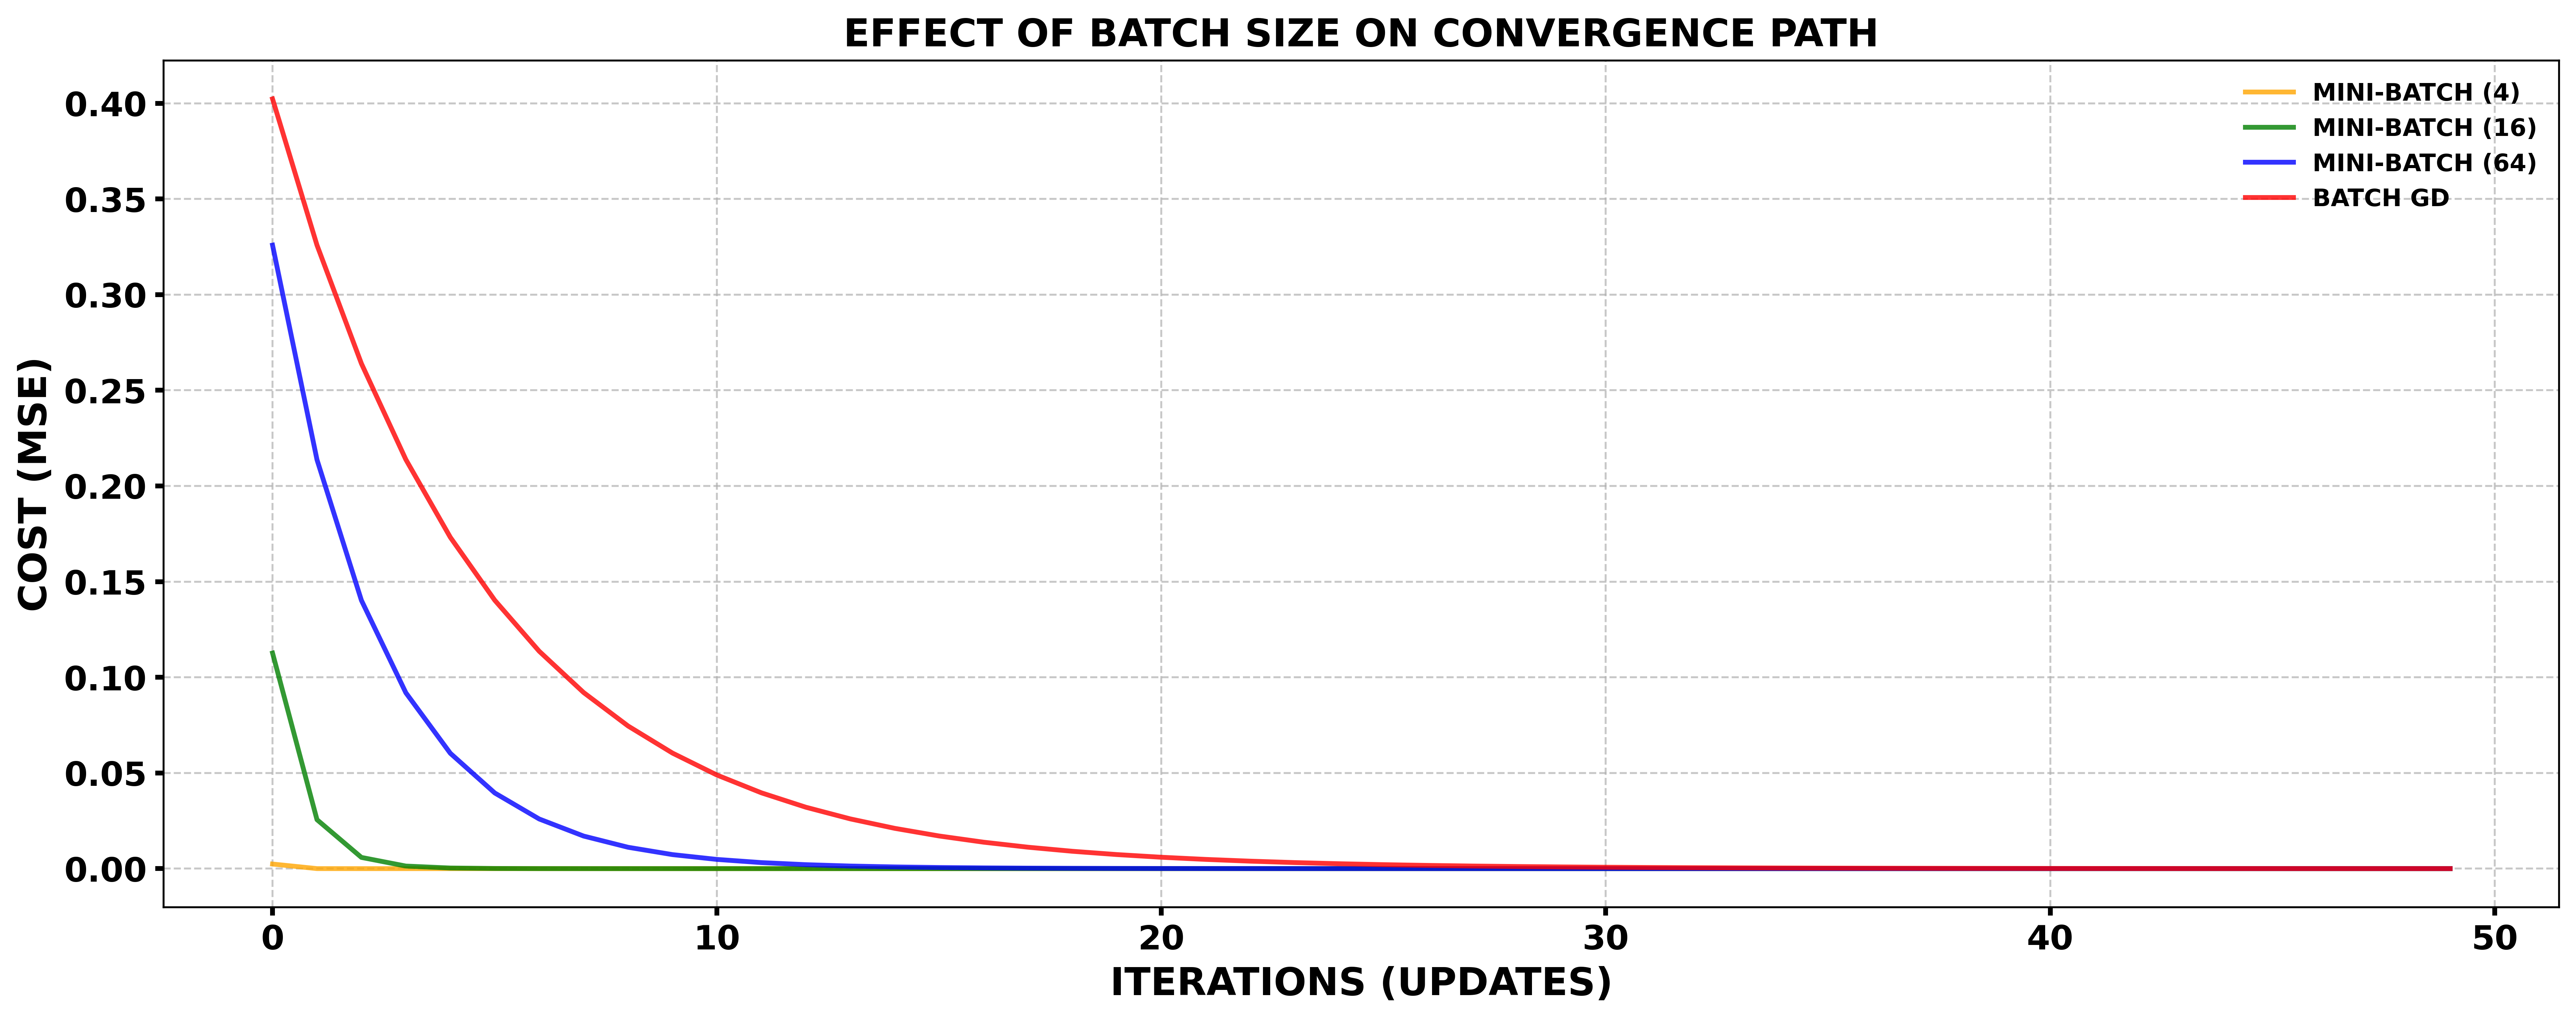

In [ ]:
# DEFINING BATCH SIZES TO TEST
batch_size = [4, 16, 64, len(y)]
labels = ['MINI-BATCH (4)', 'MINI-BATCH (16)', 'MINI-BATCH (64)', 'BATCH GD']
colors = ['orange', 'green', 'blue', 'red']

plt.figure(figsize=(15, 6), dpi=500)

# LOOPING THROUGH BATCH SIZES
for i, b_size in enumerate (batch_size):
    # RE-INITIALIZING MODEL FOR FAIR COMPARISON
    temp_model = LinearRegression(learning_rate=0.1, iterations=50)
    
    # TRAINING
    if b_size == len(y):
        _, _,  cost_hist = temp_model.train(X, y, method = 'batch') 
    else:
        _, _, cost_hist = temp_model.train(X, y, method = 'minibatch', batch_size = b_size) 
    
    # PLOTTING
    plt.plot(cost_hist, label=labels[i], color=colors[i], linewidth=2, alpha=0.8)
plt.title("EFFECT OF BATCH SIZE ON CONVERGENCE PATH", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS (UPDATES)", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()  

**OBSERVATION:**

- `MINI-BATCH SIZE = 4` CONVERGES THE FASTEST, REACHING NEAR-ZERO COST WITHIN VERY FEW UPDATES DUE TO FREQUENT WEIGHT ADJUSTMENTS.
- `MINI-BATCH SIZE = 16` SHOWS RAPID AND STABLE CONVERGENCE, PROVIDING A GOOD BALANCE BETWEEN SPEED AND GRADIENT STABILITY.
- `MINI-BATCH SIZE = 64` CONVERGES MORE GRADUALLY, AS LARGER BATCHES RESULT IN FEWER PARAMETER UPDATES PER ITERATION.
- `BATCH GRADIENT DESCENT` EXHIBITS THE SLOWEST CONVERGENCE, REQUIRING MANY ITERATIONS TO APPROACH THE GLOBAL MINIMUM.
- OVERALL, SMALLER BATCH SIZES LEAD TO FASTER INITIAL CONVERGENCE, WHILE LARGER BATCH SIZES PRODUCE SMOOTHER BUT SLOWER CONVERGENCE PATHS, HIGHLIGHTING THE SPEED–STABILITY TRADE-OFF.

## ANALYSIS OF STOCHASTIC GRADIENT DESCENT (SGD)

ANALYSING SGD FLUCTUATIONS AND NOISE

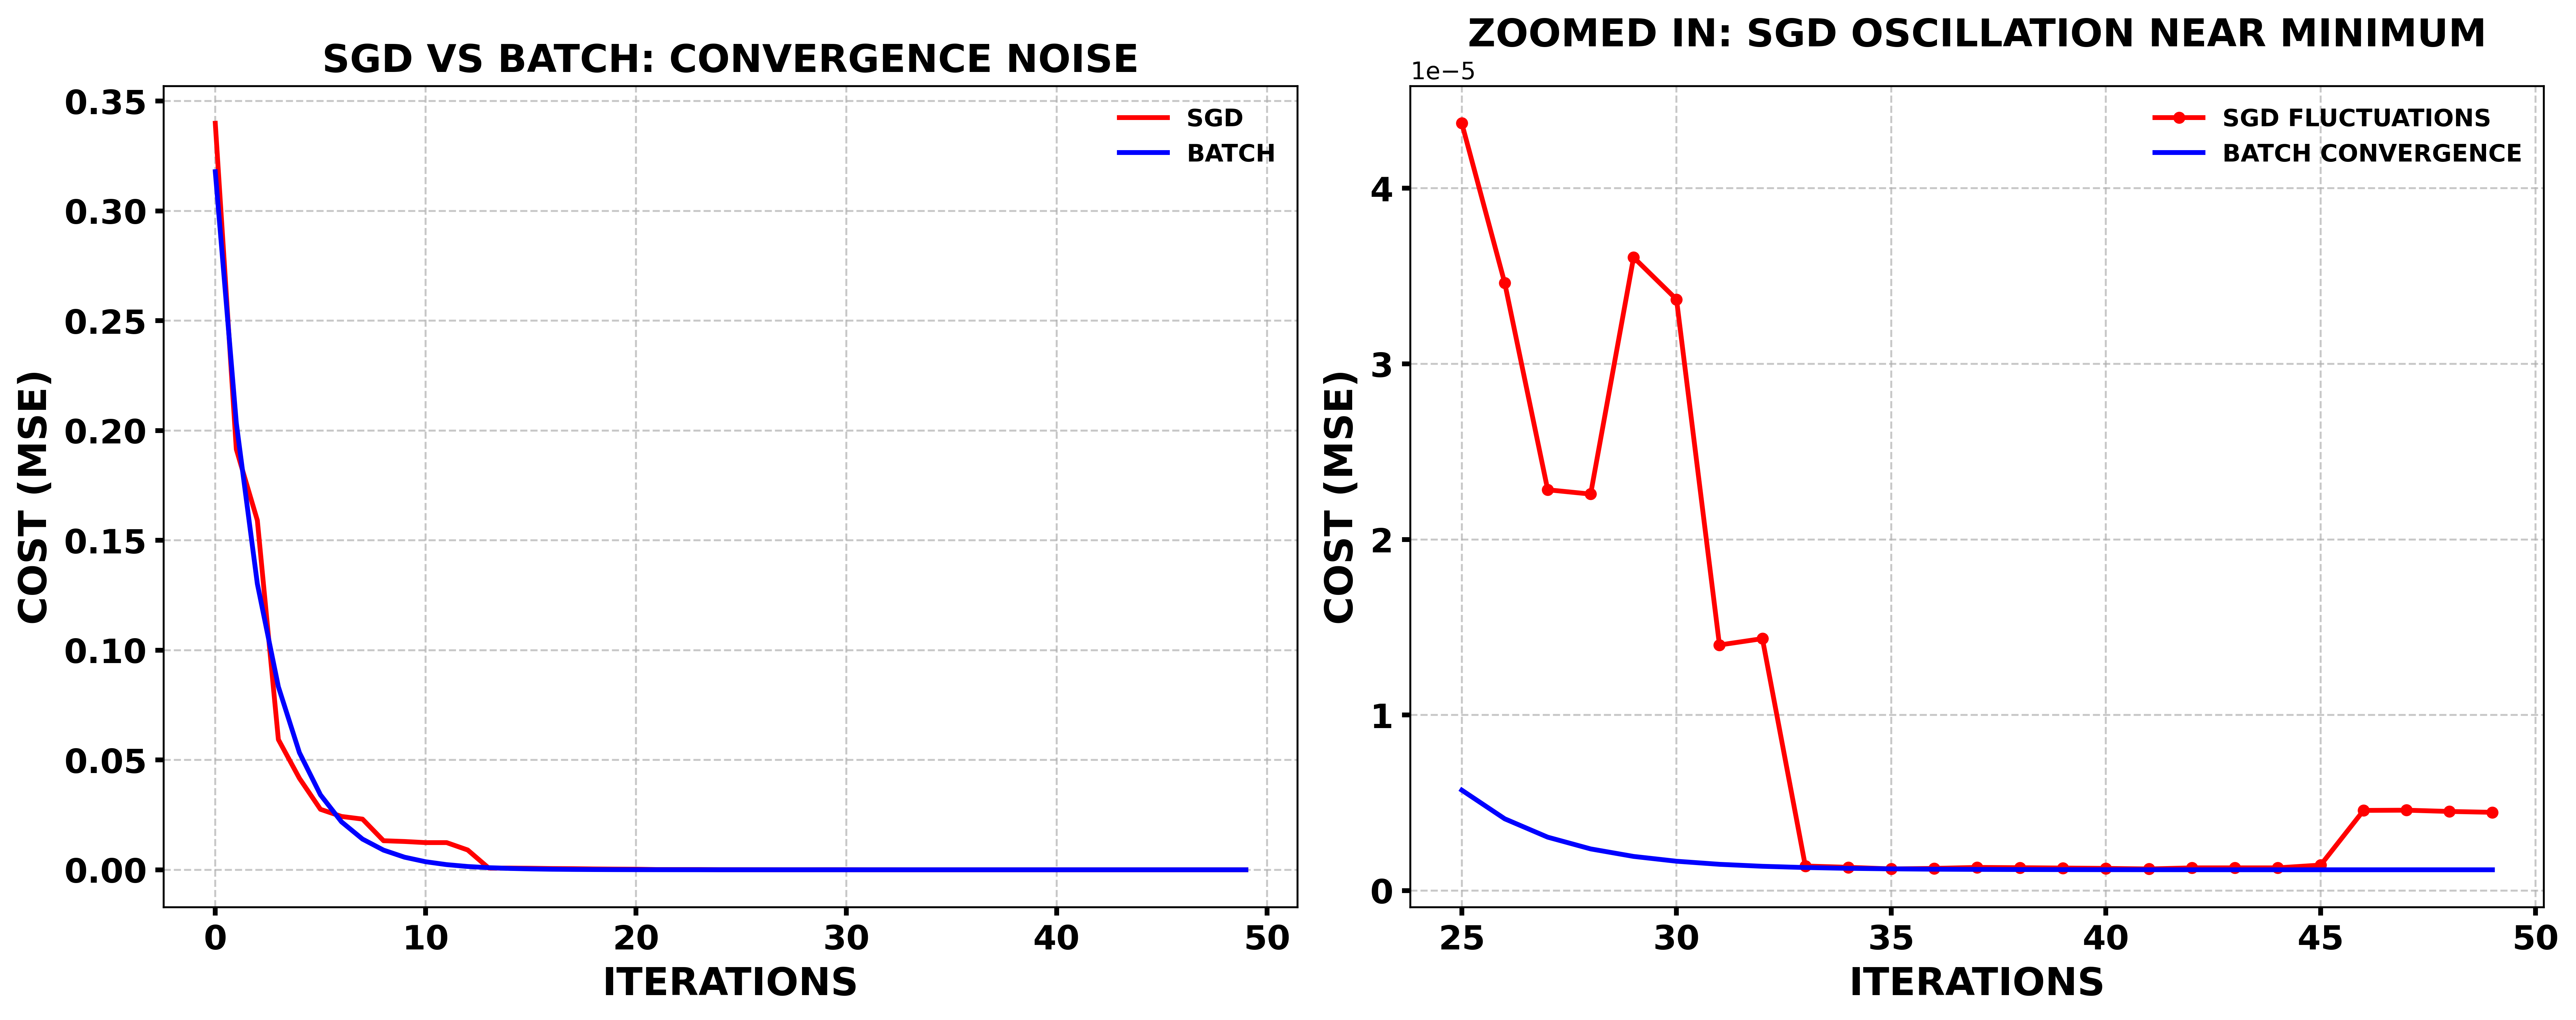

In [ ]:
# COMPARING STABILITY: SGD VS BATCH

model_sgd_noise = LinearRegression(learning_rate=0.2, iterations=50)
_, _, cost_sgd = model_sgd_noise.train(X, y, method='stochastic')

model_batch_smooth = LinearRegression(learning_rate=0.2, iterations=50)
_, _, cost_batch = model_batch_smooth.train(X, y, method='batch')

plt.figure(figsize=(15, 6), dpi=500)

# SUBPLOT 1
# FULL VIEW
plt.subplot(1, 2, 1)
plt.plot(cost_sgd, label="SGD", color="red", linewidth=2)
plt.plot(cost_batch, label="BATCH", color="blue", linewidth=2)

plt.title("SGD VS BATCH: CONVERGENCE NOISE", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

# SUBPLOT 2
# ZOOMED-IN VIEW 
# LAST 25 ITERATIONS 
# THIS SHOWS HOW SGD OSCILLATES AROUND THE MINIMUM WHILE BATCH SETTLES

start = len(cost_sgd) - 25

plt.subplot(1, 2, 2)
plt.plot(range(start, len(cost_sgd)), cost_sgd[start:], label="SGD FLUCTUATIONS", color="red", marker="o", markersize=4, linewidth=2)
plt.plot(range(start, len(cost_batch)), cost_batch[start:], label="BATCH CONVERGENCE", color="blue", linewidth=2)

plt.title("ZOOMED IN: SGD OSCILLATION NEAR MINIMUM", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

**OBSERVATION:**

- `STOCHASTIC GRADIENT DESCENT (SGD)` SHOWS FASTER INITIAL CONVERGENCE BUT EXHIBITS HIGHER VARIANCE DUE TO NOISY GRADIENT UPDATES.
- `BATCH GRADIENT DESCENT` CONVERGES MORE SMOOTHLY WITH A MONOTONIC DECREASE IN COST, INDICATING STABLE AND CONSISTENT GRADIENT ESTIMATES.
- IN THE ZOOMED-IN VIEW NEAR THE MINIMUM, SGD CLEARLY OSCILLATES AROUND THE OPTIMAL POINT, FAILING TO SETTLE EXACTLY AT THE MINIMUM.
- BATCH GRADIENT DESCENT CONTINUES TO GRADUALLY SETTLE TOWARDS THE MINIMUM WITH MINIMAL FLUCTUATIONS.
- THIS DEMONSTRATES THE FUNDAMENTAL TRADE-OFF: SGD OFFERS FASTER BUT NOISIER CONVERGENCE, WHILE BATCH GRADIENT DESCENT PROVIDES SLOWER BUT MORE STABLE OPTIMIZATION.

## ANALYSING EFFECT OF LEARNING RATE DECAY IN SGD

### 🔽 LEARNING RATE DECAY TO STABILIZE SGD CONVERGENCE

STOCHASTIC GRADIENT DESCENT (SGD) OFTEN EXHIBITS **OSCILLATIONS NEAR THE OPTIMUM** DUE TO ITS CONSTANT LEARNING RATE AND NOISY GRADIENT UPDATES. WHILE THESE FLUCTUATIONS HELP IN FASTER INITIAL CONVERGENCE, THEY PREVENT THE MODEL FROM **SETTLING PRECISELY AT THE GLOBAL MINIMUM**.

### 💡 SOLUTION: LEARNING RATE DECAY

LEARNING RATE DECAY ADDRESSES THIS ISSUE BY **GRADUALLY REDUCING THE STEP SIZE AS TRAINING PROGRESSES**.  
THIS ALLOWS:
- LARGE UPDATES DURING EARLY TRAINING FOR FAST CONVERGENCE   
- SMALLER, CONTROLLED UPDATES NEAR THE MINIMUM FOR STABILITY 

AS A RESULT, THE MODEL TRANSITIONS FROM **EXPLORATION** TO **FINE-GRAINED OPTIMIZATION**, REDUCING OVERSHOOTING AND OSCILLATIONS.

---

### 📐 MATHEMATICAL FORMULATION

THE LEARNING RATE AT EPOCH **t** IS UPDATED AS:

$$
\alpha_t = \frac{\alpha_0}{1 + \text{decay\_rate} \cdot t}
$$

WHERE:

- **α₀** : INITIAL LEARNING RATE  
- **αₜ** : LEARNING RATE AT EPOCH *t*  
- **DECAY RATE** : CONTROLS HOW FAST THE LEARNING RATE DECREASES  
- **t (EPOCH)** : CURRENT TRAINING ITERATION  
---

### ✅ KEY BENEFITS OF LEARNING RATE DECAY

- REDUCES SGD OSCILLATIONS NEAR THE OPTIMUM  
- IMPROVES CONVERGENCE STABILITY  
- ENABLES PRECISE MINIMUM ATTAINMENT  
- ENHANCES OVERALL TRAINING ROBUSTNESS  

📌 **IN PRACTICE, LEARNING RATE DECAY MAKES SGD BOTH FAST AND STABLE, COMBINING THE BEST OF STOCHASTIC AND BATCH OPTIMIZATION BEHAVIOR.**

LOG-SCALE & TAIL ZOOM

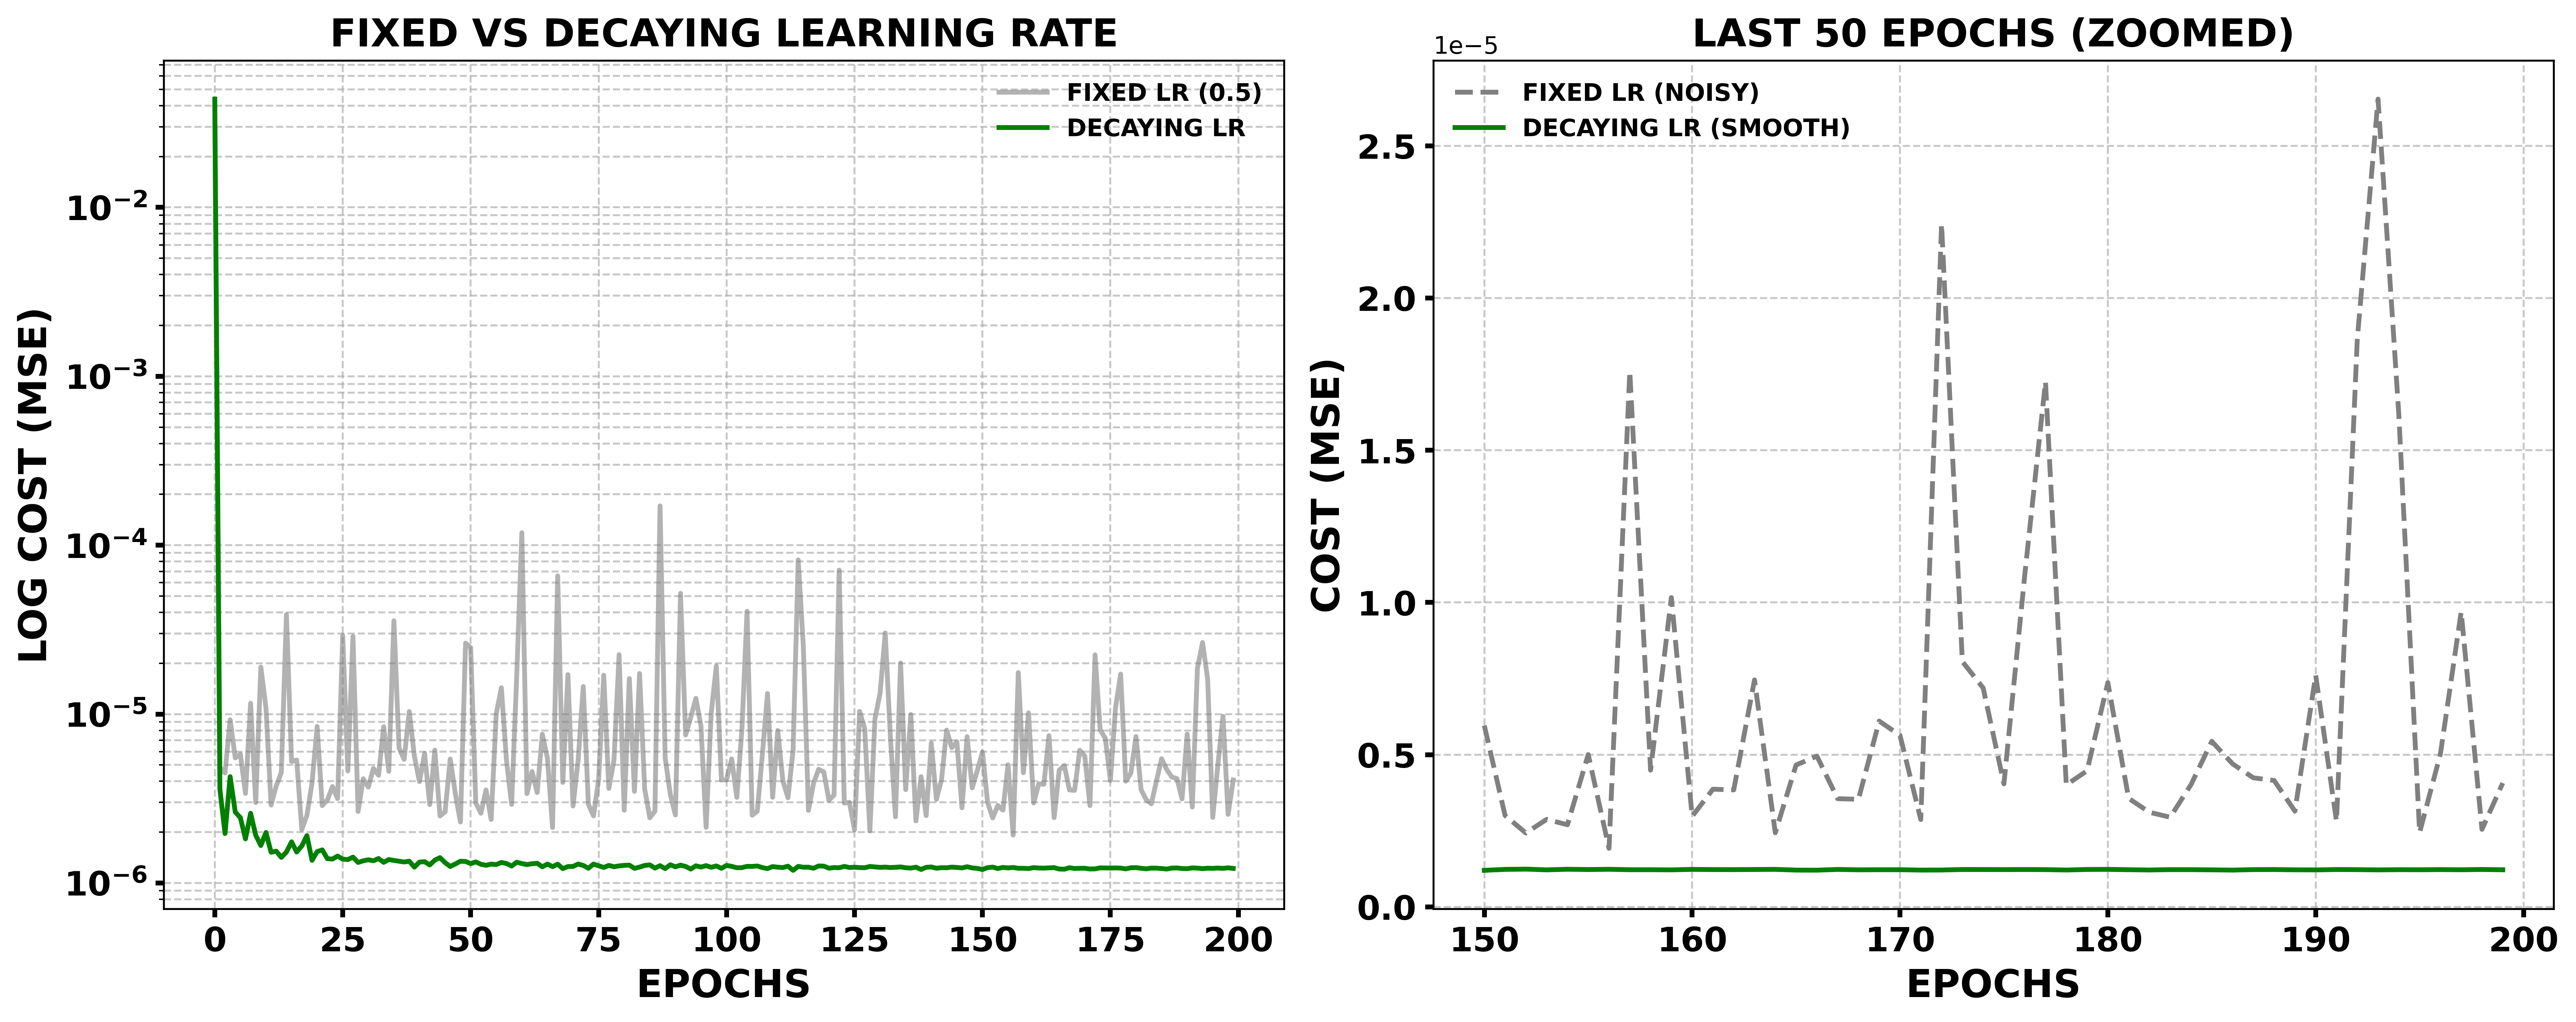

In [9]:
# IMPLEMENTING SGD WITH LEARNING RATE DECAY MANUALLY
def sgd_with_decay(X, y, lr_start=0.5, decay_rate=0.1, epochs=200):
    weights = np.random.randn()
    bias = np.random.randn()
    m = len(y)
    cost_history = []
    
    for epoch in range(epochs):
        # UPDATING LEARNING RATE FOR THIS EPOCH
        current_lr = lr_start / (1 + decay_rate * epoch)
        
        # SHUFFLING DATA EACH EPOCH
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_cost = 0
        
        for i in range(m):
            xi = X_shuffled[i]
            yi = y_shuffled[i]
            
            # PREDICTION
            pred = weights * xi + bias
            error = pred - yi
            
            # ACCUMULATE COST
            epoch_cost += error**2
            
            # UPDATE (SGD STEP)
            weights -= current_lr * (error * xi)
            bias -= current_lr * error
       
        # STORE AVERAGE COST FOR THE EPOCH    
        cost_history.append((1 / (2 * m)) * epoch_cost)
        
    return cost_history

# COMPARISON: CONSTANT LR VS DECAYING LR
epochs_run = 200
cost_fixed = sgd_with_decay(X, y, lr_start=0.5, decay_rate=0, epochs=epochs_run)
cost_decay = sgd_with_decay(X, y, lr_start=0.5, decay_rate=0.1, epochs=epochs_run)

# PLOTTING
plt.figure(figsize=(15, 6), dpi=500)

# SUBPLOT 1
# FULL HISTORY 
# LOG SCALE

plt.subplot(1, 2, 1)
plt.plot(cost_fixed, label="FIXED LR (0.5)", color="gray", alpha=0.6, linewidth=2)
plt.plot(cost_decay, label="DECAYING LR", color="green", linewidth=2)

plt.yscale("log")

plt.title("FIXED VS DECAYING LEARNING RATE", fontsize=16, fontweight='bold')
plt.xlabel("EPOCHS", fontsize=16, fontweight='bold')
plt.ylabel("LOG COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

# SUBPLOT 2
# ZOOMED VIEW 
# LAST 50 EPOCHS

tail_n = 50
start = epochs_run - tail_n

plt.subplot(1, 2, 2)
plt.plot(range(start, epochs_run), cost_fixed[-tail_n:], label="FIXED LR (NOISY)", color="gray", linestyle="--", linewidth=2)
plt.plot(range(start, epochs_run), cost_decay[-tail_n:], label="DECAYING LR (SMOOTH)", color="green", linewidth=2)

plt.title(f"LAST {tail_n} EPOCHS (ZOOMED)", fontsize=16, fontweight='bold')
plt.xlabel("EPOCHS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

**OBSERVATION:**

- WITH A **FIXED LEARNING RATE**, SGD EXHIBITS CLEAR FLUCTUATIONS AROUND THE MINIMUM, INDICATING NOISY UPDATES AND INABILITY TO FULLY SETTLE EVEN AFTER MANY EPOCHS.
- THE **DECAYING LEARNING RATE** SHOWS A CONSISTENT AND SMOOTHER REDUCTION IN COST, AS SEEN CLEARLY IN THE LOG-SCALE PLOT.
- IN THE ZOOMED-IN VIEW OF THE LAST EPOCHS, FIXED LR CONTINUES TO OSCILLATE, WHILE THE DECAYING LR CURVE REMAINS STABLE AND WELL-CONVERGED.
- LEARNING RATE DECAY ALLOWS LARGE STEPS DURING EARLY TRAINING FOR FAST CONVERGENCE AND SMALL STEPS NEAR THE OPTIMUM FOR FINE-GRAINED ADJUSTMENTS.
- THIS CONFIRMS THAT **LEARNING RATE DECAY EFFECTIVELY REDUCES SGD NOISE AND IMPROVES CONVERGENCE STABILITY**, LEADING TO BETTER MINIMUM ATTAINMENT.

## EVALUATION METRICS

In [17]:
# DEFINING EVALUATION METRICS FUNCTIONS USING NUMPY
def mean_absolute_error(y_true, y_pred):
    # FORMULA: (1/m) * SUM(|y_true - y_pred|)
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    # FORMULA: (1/m) * SUM((y_true - y_pred)^2)
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    # FORMULA: SQRT(MSE)
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    # R SQUARED SCORE (COEFFICIENT OF DETERMINATION)
    # FORMULA: 1 - (SS_RESIDUAL / SS_TOTAL)
    # SS_RESIDUAL = SUM((y_true - y_pred)^2)
    # SS_TOTAL = SUM((y_true - mean(y_true))^2)
    
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    
    return 1 - (ss_residual / ss_total)

# GENERATING PREDICTIONS USING OUR BEST MODEL
y_pred = model.predict(X)

# CALCULATING METRICS
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("--- MODEL EVALUATION FROM SCRATCH ---")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 SCORE: {r2:.4f}")

--- MODEL EVALUATION FROM SCRATCH ---
MAE:  0.0013
MSE:  0.0000
RMSE: 0.0016
R2 SCORE: 0.3819


## VERIFICATION WITH SCIKIT-LEARN

In [21]:
# IMPORTING SCIKIT LEARN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2_sk, mean_absolute_error as mae_sk, mean_squared_error as mse_sk, root_mean_squared_error as rmse_sk

# RESHAPING X FOR SKLEARN (REQUIRES 2D ARRAY)
X_sk = X.reshape(-1, 1)

# INITIALIZING AND TRAINING SKLEARN MODEL
model_sk = LinearRegression()
model_sk.fit(X_sk, y)

# GETTING PREDICTIONS FROM SKLEARN
y_pred_sk = model_sk.predict(X_sk)

# COMPARISON DATAFRAME
df_compare = pd.DataFrame({
    'TRUE Y' : y[:10],
    'MODEL PRED' : y_pred[:10],
    'SKLEARN PRED' : y_pred_sk[:10],
    'DIFFERENCE': np.abs(y_pred[:10] - y_pred_sk[:10])
})

print("--- COMPARISON: FIRST 10 PREDICTIONS ---")
print(df_compare)

print("\n--- PARAMETER COMPARISON ---")
print(f"MODEL WEIGHT: {model.weights:.6f}")
print(f"SKLEARN COEF:   {model_sk.coef_[0]:.6f}")
print(f"MODEL BIAS:   {model.bias:.6f}")
print(f"SKLEARN INTERCEPT: {model_sk.intercept_:.6f}")

print("\n--- R2 SCORE VERIFICATION ---")
print(f"MODEL R2: {r2:.6f}")
print(f"SKLEARN R2: {r2_sk(y, y_pred_sk):.6f}")

print("\n--- MAE VERIFICATION ---")
print(f"MODEL MAE: {mae:.6f}")
print(f"SKLEARN MAE: {mae_sk(y, y_pred_sk):.6f}")

print("\n--- MSE VERIFICATION ---")
print(f"MODEL MSE: {mse:.6f}")
print(f"SKLEARN MSE: {mse_sk(y, y_pred_sk):.6f}")

print("\n--- RMSE VERIFICATION ---")
print(f"MODEL RMSE: {rmse:.6f}")
print(f"SKLEARN RMSE: {rmse_sk(y, y_pred_sk):.6f}")

--- COMPARISON: FIRST 10 PREDICTIONS ---
    TRUE Y  MODEL PRED  SKLEARN PRED  DIFFERENCE
0  0.99007    0.996107      0.996594    0.000487
1  0.99769    0.996971      0.997458    0.000487
2  0.99386    0.996421      0.996908    0.000487
3  0.99508    0.995243      0.995730    0.000486
4  0.99630    0.995872      0.996358    0.000487
5  1.00320    1.002074      1.002564    0.000490
6  0.99768    0.995557      0.996044    0.000486
7  0.99584    0.995322      0.995808    0.000486
8  0.99609    0.995479      0.995965    0.000486
9  0.99774    0.997756      0.998243    0.000487

--- PARAMETER COMPARISON ---
MODEL WEIGHT: 0.001357
SKLEARN COEF:   0.001358
MODEL BIAS:   0.996148
SKLEARN INTERCEPT: 0.996634

--- R2 SCORE VERIFICATION ---
MODEL R2: 0.381911
SKLEARN R2: 0.438185

--- MAE VERIFICATION ---
MODEL MAE: 0.001257
SKLEARN MAE: 0.001116

--- MSE VERIFICATION ---
MODEL MSE: 0.000003
SKLEARN MSE: 0.000002

--- RMSE VERIFICATION ---
MODEL RMSE: 0.001613
SKLEARN RMSE: 0.001538


## VISUALIZING THE OVERLAP

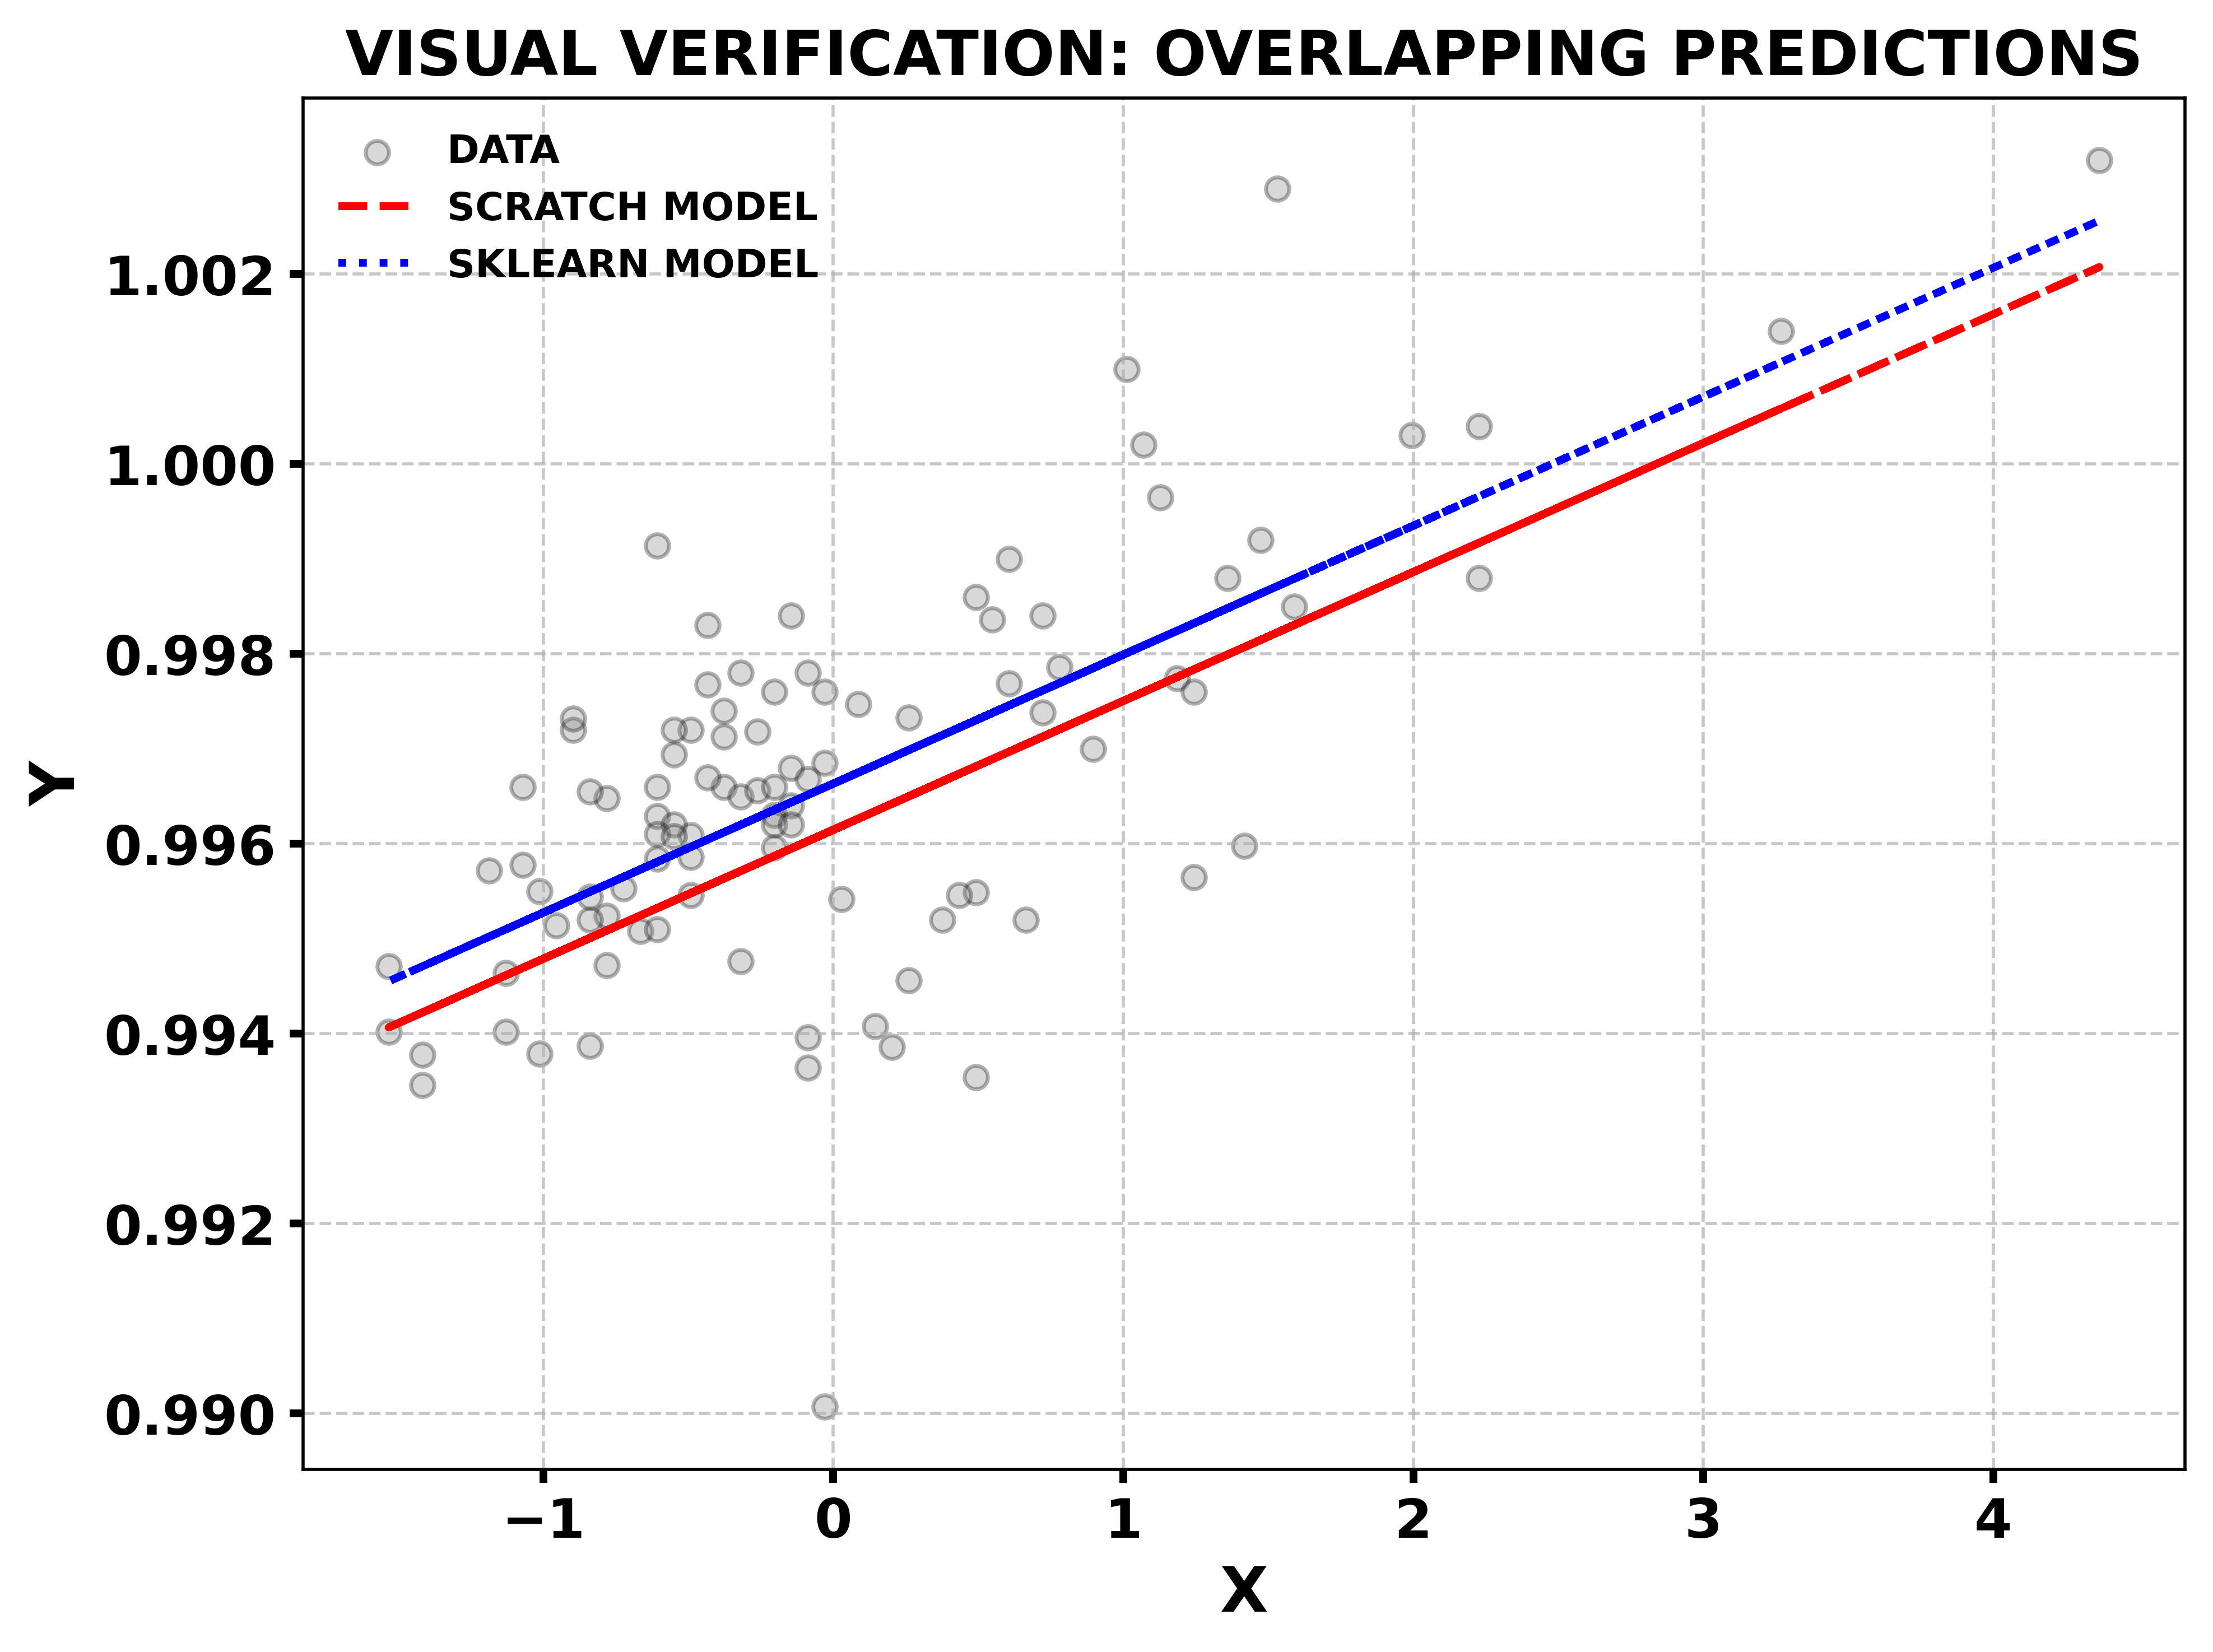

In [ ]:
plt.figure(figsize=(8, 6), dpi=500)

plt.scatter(X, y, color="gray", alpha=0.3, edgecolor="black", label="DATA") 
plt.plot(X, y_pred, linestyle="--", color="red", linewidth=2, label="SCRATCH MODEL") 
plt.plot(X, y_pred_sk, linestyle=":", color="blue", linewidth=2, label="SKLEARN MODEL") 
plt.title("VISUAL VERIFICATION: OVERLAPPING PREDICTIONS", fontsize=16, fontweight="bold")
plt.xlabel("X", fontsize=16, fontweight="bold")
plt.ylabel("Y", fontsize=16, fontweight="bold")

plt.tick_params(axis="both", which="major", labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight("bold")

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={"weight": "bold"})

plt.tight_layout()
plt.show()

## 🔍 OBSERVATION: BATCH GRADIENT DESCENT VS SKLEARN LINEAR REGRESSION

> **OBJECTIVE:** VERIFY THE CORRECTNESS AND PERFORMANCE OF A  
- `CUSTOM BATCH GRADIENT DESCENT (BGD)` IMPLEMENTATION  
- AGAINST `SKLEARN LINEAR REGRESSION`.

---

## 📈 VISUAL VERIFICATION
> THE PREDICTION LINES FROM BOTH MODELS **OVERLAP VERY CLOSELY** ACROSS THE ENTIRE INPUT RANGE.

- THIS STRONG VISUAL AGREEMENT CONFIRMS:
  - CORRECT **COST FUNCTION FORMULATION**
  - CORRECT **GRADIENT COMPUTATION**
  - PROPER **PARAMETER UPDATES USING BATCH GD**

`→ THE SCRATCH MODEL SUCCESSFULLY LEARNS THE SAME LINEAR TREND AS SKLEARN.`

---

## 🧮 PREDICTION CONSISTENCY
> THE DIFFERENCE BETWEEN PREDICTIONS IS **CONSISTENT (~ 0.00048)** FOR ALL SAMPLES.

- INDICATES:
  - **STABLE CONVERGENCE**
  - NO STOCHASTIC NOISE (AS EXPECTED IN BATCH GD)
  - A UNIFORM OFFSET CAUSED BY SLIGHT PARAMETER DIFFERENCES

`→ BOTH MODELS ARE FUNCTIONALLY EQUIVALENT.`

---

## ⚙️ PARAMETER COMPARISON
> MODEL PARAMETERS ARE **NUMERICALLY VERY CLOSE**.

- `WEIGHT ≈ COEFFICIENT` → SAME SLOPE LEARNED  
- `BIAS ≠ INTERCEPT (SLIGHTLY)` → SOURCE OF SMALL PREDICTION SHIFT

> THIS SMALL DEVIATION OCCURS BECAUSE:
- BATCH GD USES **ITERATIVE NUMERICAL OPTIMIZATION**
- SKLEARN COMPUTES AN **EXACT CLOSED-FORM SOLUTION (NORMAL EQUATION / SVD)**
- BGD STOPS AT A **NEAR-OPTIMAL MINIMUM**, NOT THE EXACT ONE

---

## 📊 PERFORMANCE METRICS COMPARISON
> **SKLEARN SLIGHTLY OUTPERFORMS THE SCRATCH MODEL**

- HIGHER `R² SCORE`
- LOWER `MAE`, `MSE`, AND `RMSE`

> THIS IS EXPECTED BECAUSE:
- SKLEARN SOLVES LINEAR REGRESSION **ANALYTICALLY**
- NO DEPENDENCE ON:
  - LEARNING RATE
  - NUMBER OF EPOCHS
  - CONVERGENCE THRESHOLDS
- RESULTS IN **MINIMUM POSSIBLE ERROR** FOR THE GIVEN DATA

---

## ✅ FINAL CONCLUSION
> `BATCH GRADIENT DESCENT IMPLEMENTATION IS CORRECT AND VERIFIED`

- MATCHES SKLEARN TREND AND SCALE
- ACHIEVES **NEAR-IDENTICAL PREDICTIONS**
- MINOR PERFORMANCE GAP IS **THEORETICAL AND EXPECTED**

> **KEY TAKEAWAY:**  
- `BATCH GD PROVIDES A HIGHLY ACCURATE NUMERICAL APPROXIMATION`  
- WHILE `SKLEARN PROVIDES THE EXACT OPTIMAL SOLUTION`.

✨ **THIS COMPARISON STRONGLY VALIDATES THE MATHEMATICS AND IMPLEMENTATION OF BATCH GRADIENT DESCENT.**
